# Problem Set 2022/23 - Simon Hilding-Nørkjær (xsj415)


### Pre-loading packages and functions: 

In [1074]:
import numpy as np                                     
from numpy.linalg import matrix_power                  
import matplotlib.pyplot as plt                                                        
from iminuit import Minuit                            
import sys                                            
from scipy import stats
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display

plt.style.use('classic')

sys.path.append('../External_Functions')
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax   

sys.path.append('../MyExternalFunctions')
from MyExternalFunctions import Errorpropagation

## I - Distributions and probabilities:

### 1.1) Your friend tells you, that a bag contains 3 white, 6 black, and 7 grey marbles.

#### 1.1.1) If you take two random marbles without putting them back, what is the probability that at least one of them is white?

In [1044]:
n_white , n_black , n_grey = 3 , 6 , 7
N = n_white + n_black + n_grey

#first draw
p_white = n_white/N
p_other = 1-p_white

#second draw
p_other_given_other = (n_black+n_grey-1)/(N-1)
p_atleast1white = 1 - p_other*p_other_given_other

print('Probability of white marble on first draw =',p_white)
print('Probability of other marble on first draw =',p_other)
print('Probability of other marble on second draw =',p_other_given_other)
print('Probability of at least one white marble =',p_atleast1white)  

Probability of white marble on first draw = 0.1875
Probability of other marble on first draw = 0.8125
Probability of other marble on second draw = 0.8
Probability of at least one white marble = 0.35


#### 1.1.2) If you pick a marble, record its color, and then put it back 25 times independently, what is the probability of getting exactly 18 grey marbles? At least 18 grey marbles?

In [1169]:
p_grey = n_grey/N
P_18grey_of_25 = stats.binom.pmf(18,25,p_grey)
P_atleast_18grey_of_25 = stats.binom.sf(17,25,p_grey)
print('Probability of 18 grey marbles out of 25 trials =',P_18grey_of_25)
print('Probability of at least 18 grey marbles out of 25 trials =',P_atleast_18grey_of_25)


Probability of 18 grey marbles out of 25 trials = 1.2047238254754099e-33
Probability of at least 18 grey marbles out of 25 trials = 1.2079451116195498e-33


0.543794342926747

#### 1.1.3) If you got 18 grey marbles out of 25 picks, would you trust your friend’s information?

In [1043]:

# expected number of grey marbles
Expected_grey = 25*p_grey
# binomial standard deviation of grey marbles
sigma_grey = np.sqrt(25*p_grey*(1-p_grey))
# z-score
z = (18-Expected_grey)/sigma_grey
# p-value
p = stats.norm.sf(z)

print('Expected number of grey marbles =',Expected_grey)
print('Standard deviation of grey marbles =',sigma_grey)
print('z-score =',z)
print('p-value =',p)
print('Conclusion: I would not trust the information as the p-value based on the z-score show is really low.')

Expected number of grey marbles = 10.9375
Standard deviation of grey marbles = 2.4803918541230536
z-score = 2.8473323633361787
p-value = 0.0022043653491208926
Conclusion: I would not trust the information as the p-value based on the z-score show is really low.


### 1.2) 
The lifetime L of a certain component is exponentially distributed: L(t) = 1/τ exp(−t/τ ).
If there is a 4% chance of this component lasting more than 500 hours, what is the value of τ ?

In [6]:
#solving the intgral of L(t) = 1/τ exp(−t/τ ) from 0 to 500 using sympy 

t, tau = sp.symbols('t tau', real=True)
L = 1/tau*sp.exp(-t/tau)
P_L500 = integrate(L,(t,500,sp.oo),conds='none')
Tau = sp.solve(P_L500-0.04,tau)   #solving for tau and because the integral is from 500 to infinity

print(r'The lifetime of the particle is {:.2f}, hours'.format(Tau[0]))

The lifetime of the particle is 155.33, hours


### 1.3) A radio telescope detects 241089 signals/day, based on a 9 week observation campaign.

#### 1.3.1) One hour, it receives 9487 signals. What is the chance of observing exactly this number?

In [1045]:
detection_rate = 241089       #counts per day 
signal = 9487                 #signal in one hour

#probability of detecting the signal in one hour
P_signal2 = stats.poisson.pmf(signal,detection_rate/24)
print('Probability of detecting the signal in one hour: ',P_signal2.round(12))

 
#The signal is a single event with some uncertainty whereas the detection rate is the average number of events over a long period of time.
#Therefore scaling the signal by 24 hours will have a bigger uncertainty than dividing the detection rate by 24 hours to match the samples. 


Probability of detecting the signal in one hour:  5.55e-10


#### 1.3.2) Is this observation extraordinary, based on an estimate of its general probability?

In [1048]:
#expected number of signal in one hour
Lambda = detection_rate/24

#Poissonian standard deviation of signal in one hour
sigma_Lambda = np.sqrt(Lambda) 

#z-score
z = (abs(signal-Lambda))/sigma_Lambda

#p-value
p = stats.norm.sf(z)

print('Expected number of signal in one hour =',Lambda)
print('sigma_Lambda =',sigma_Lambda)
print('z-score =',z)
print('p-value =',p)
print('Conclusion: Very unlikely observation based on p-value and z-score.')

Expected number of signal in one hour = 10045.375
sigma_Lambda = 100.22661822090976
z-score = 5.571124816057189
p-value = 1.2654995762494655e-08
Conclusion: Very unlikely observation based on p-value and z-score.


### 1.4 )  Shooting with a bow, you have 3% chance of hitting a certain target

#### 1.4.1) What distribution is the number of hits going to follow, given N shots?

In [1066]:
#Binomial distribution with p=0.03 give N shots

0.5606127246667495

#### 1.4.2) What is the probability that the first hit will come after 20 shots?

In [1176]:
#probability of getting first hit after 20 shots

p = 0.03
P_1hit_at_20 = (1-p)**19 * p
print(f'Probability of getting first hit after exactly 20 shots: {P_1hit_at_20:.3f}')

P_1hit_after_20= 0.97**20
print(f'Probability of getting first hit after more than 20 shots: {P_1hit_after_20:.3f}')

Probability of getting first hit after exactly 20 shots: 0.017
Probability of getting first hit after more than 20 shots: 0.544


#### 1.4.3) What is the probability that it will take more than 4000 shots to hit the target 100 times?

In [1183]:
#probability of it taking more than 4000 shots to hit 100 times 
P_100_in_less_than_4000shots = stats.binom.sf(99,4000,p)      #i.e. P of more than 99 hits in 4000 shots
P_100_in_more_than_4000shots = stats.binom.cdf(100,4000,p)    #i.e. P of less than 100 hits in 4000 shots

print(f'Probability of it taking more than 4000 shots to hit 100 times: {P_100_in_less_than_4000shots:.3f}')
print(f'Probability of it taking less than 4000 shots to hit 100 times: {P_100_in_more_than_4000shots:.3f}')

Probability of it taking more than 4000 shots to hit 100 times: 0.974
Probability of it taking less than 4000 shots to hit 100 times: 0.033


## II - Error Propagation

### 2.1)  Let x = 1.92 ± 0.39 and y = 3.1 ± 1.3, and let z1 = y/x, and z2 = cos(x) · x/y

In [1071]:
X =  1.92 
Xerr = 0.39
Y = 3.1 
Yerr = 1.3

z1 = 'y/x'
z2= 'cos(x)*x/y'

#### 2.1.1)  What are the uncertainties of z1 and z2, if x and y are uncorrelated?

In [1075]:
z1_eq, z1_func , z1_func_err, z1_contrib = Errorpropagation(z1, 'x y')
z2_eq, z2_func , z2_func_err, z2_contrib = Errorpropagation(z2, 'x y')

z1_err = z1_func_err(X,Y,Xerr,Yerr)
z2_err = z2_func_err(X,Y,Xerr,Yerr)

display(z1_eq)
print_latex(z1_eq)
display(z2_eq)
print_latex(z2_eq)


print('z1 =',z1_func(X,Y),  '±',z1_err)
print('z2 =',z2_func(X,Y),  '±',z2_err)

sqrt((sigma_x**2*y**2 + sigma_y**2*x**2)/x**4)

\sqrt{\frac{\sigma_{x}^{2} y^{2} + \sigma_{y}^{2} x^{2}}{x^{4}}}


sqrt((sigma_x**2*y**2*(x*sin(x) - cos(x))**2 + sigma_y**2*x**2*cos(x)**2)/y**4)

\sqrt{\frac{\sigma_{x}^{2} y^{2} \left(x \sin{\left(x \right)} - \cos{\left(x \right)}\right)^{2} + \sigma_{y}^{2} x^{2} \cos^{2}{\left(x \right)}}{y^{4}}}
z1 = 1.6145833333333335 ± 0.7523304266546008
z2 = -0.21191204200313693 ± 0.2842622855511739


#### 2.1.2) If x and y were highly correlated (ρxy = 0.95), what would be the uncertainty on z1?

In [1078]:
rho_xy = [[1,0.95],[0.95,1]]                #correlation matrix


z1cor_eq, z1cor_func , z1cor_func_err = Errorpropagation(z1, 'x y', rho= rho_xy)
z2cor_eq, z2cor_func , z2cor_func_err = Errorpropagation(z2, 'x y', rho= rho_xy)

z1cor_err = z1cor_func_err(X,Y,Xerr,Yerr)
z2cor_err = z2cor_func_err(X,Y,Xerr,Yerr)

display(z1cor_eq)
print_latex(z1cor_eq)
display(z2cor_eq)
print_latex(z2cor_eq)

print('z1 =',z1cor_func(X,Y),  '±',z1cor_err)
print('z2 =',z2cor_func(X,Y),  '±',z2cor_err)


sqrt((sigma_x**2*y**2 - 1.9*sigma_x*sigma_y*x*y + sigma_y**2*x**2)/x**4)

\sqrt{\frac{\sigma_{x}^{2} y^{2} - 1.9 \sigma_{x} \sigma_{y} x y + \sigma_{y}^{2} x^{2}}{x^{4}}}


sqrt((sigma_x**2*y**2*(x*sin(x) - cos(x))**2 + 0.95*sigma_x*sigma_y*x*y*(x*sin(2*x) - cos(2*x) - 1) + sigma_y**2*x**2*cos(x)**2)/y**4)

\sqrt{\frac{\sigma_{x}^{2} y^{2} \left(x \sin{\left(x \right)} - \cos{\left(x \right)}\right)^{2} + 0.95 \sigma_{x} \sigma_{y} x y \left(x \sin{\left(2 x \right)} - \cos{\left(2 x \right)} - 1\right) + \sigma_{y}^{2} x^{2} \cos^{2}{\left(x \right)}}{y^{4}}}
z1 = 1.6145833333333335 ± 0.37959361788582696
z2 = -0.21191204200313693 ± 0.18765438767628737


#### 2.1.3) Which of the (uncorrelated) variables x and y contributes most to the uncertainty on z2?

In [1077]:
display(*z2_contrib)
print_latex(z2_contrib[0])
print_latex(z2_contrib[1])

symbols = sp.symbols('x y sigma_x sigma_y')
sigmax = sp.lambdify(symbols,z2_contrib[0])
sigmay = sp.lambdify(symbols,z2_contrib[1])

print('sigma_x =',sigmax(X,Y,Xerr,Yerr))
print('sigma_y =',sigmay(X,Y,Xerr,Yerr))

#For the uncorrelated variables x has a contribution to the uncertainty of z2 of almost a factor of 10 more than y.


sigma_x**2*(x*sin(x) - cos(x))**2/y**2

sigma_y**2*x**2*cos(x)**2/y**4

\frac{\sigma_{x}^{2} \left(x \sin{\left(x \right)} - \cos{\left(x \right)}\right)^{2}}{y^{2}}
\frac{\sigma_{y}^{2} x^{2} \cos^{2}{\left(x \right)}}{y^{4}}
sigma_x = 0.07290782056714783
sigma_y = 0.00789722641962928


### 2.2) Five patients were given a drug to test if they slept longer (in hours). 
##### Their results were:+3.7, −1.2, −0.2, +0.7, +0.8. A Placebo group got the results: +1.5, −1.0, −0.7, +0.5, +0.1

In [15]:
drug_group = np.array([3.7, -1.2, -0.2, 0.7, 0.8])
placebo_group = np.array([1.5, -1.0, -0.7, 0.5, 0.1])

#### 2.2.1) Estimate the mean, standard deviation, and the uncertainty on the mean for drug group

In [16]:
#mean , std and error on the mean of drug group
mean_drug = np.mean(drug_group)
std_drug = np.std(drug_group, ddof=1)
err_drug = std_drug/np.sqrt(len(drug_group))

#mean , std and error on the mean of placebo group
mean_placebo = np.mean(placebo_group)
std_placebo = np.std(placebo_group, ddof=1)
err_placebo = std_placebo/np.sqrt(len(placebo_group))


# print the results
print('Drug group: Mean = {:.2f} +/- {:.2f}, STD of distribution = {:.2f}'.format(mean_drug,err_drug,std_drug))
print('Placebo group: Mean = {:.2f} +/- {:.2f}, STD of distribution = {:.2f}'.format(mean_placebo,err_placebo,std_placebo))

Drug group: Mean = 0.76 +/- 0.82, STD of distribution = 1.83
Placebo group: Mean = 0.08 +/- 0.45, STD of distribution = 1.00


#### 2.2.2) What is the probability that the drug group slept longer than the placebo group?

As the means and std's for the two samples are estimated we have to use the students t test in order to test the null hypothesis that the true sample means are equal. 

In [1185]:
#calculate the student t-test for the means of two independent samples of scores


t, p_ttest = stats.ttest_ind(drug_group, placebo_group, equal_var=False, alternative='greater')


print(f't-statistic = {t:.2f}')
print(f'p-value = {p_ttest:.2f}')

print('Conclusion: The drug group has a higher mean than the placebo group based on the p-value.')

t-statistic = 0.73
p-value = 0.25
Conclusion: The drug group has a higher mean than the placebo group based on the p-value.


## III - Simulation / Monte Carlo:

### 3.1) Assume $f(x) = Cx^asin(πx)$ for x ∈ [0, 1] and a = 3 is a theoretical distribution.

#### 3.1.1) By what method(s) would you generate random numbers according to f (x)?

As the function f(x) is not invertable we cannot use the Inverse Transform method. Instead I will use the acceptance-rejection method for generation radom numbers according to f(x).


#### 3.1.2) Determine (possibly numerically) the value of C for f (x) to be normalised.


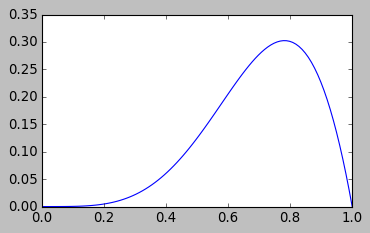

In [1080]:
xmin, xmax = 0, 1

def f(x,a,C):
    return x**a*np.sin(np.pi*x) * C

xAxis = np.linspace(xmin,xmax,100)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xAxis,f(xAxis,a=3,C=1))

In [1081]:
#Choosing range of y values between 0 and 0.35 according to the plot
r = np.random
r.seed(1234)

ymin, ymax = 0, 0.35

N_try = 0
N_accepted = 20000
x_accepted = []

while len(x_accepted) < N_accepted:
    x = r.uniform(xmin,xmax)
    y = r.uniform(ymin,ymax)
    if y < f(x,a=3,C=1):
        x_accepted.append(x)
    N_try += 1

print('Number of tries: ',N_try)


Number of tries:  55992


In [1082]:
# Efficiency
eff = N_accepted / N_try 
eff_error = np.sqrt(eff * (1-eff) / N_try)        # binomial error

# Integral
integral =  eff * (xmax-xmin) * (ymax-ymin)
eintegral = eff_error * (xmax-xmin) * (ymax-ymin)  

# Normalization is then 
norm = 1 / integral
enorm = eintegral / integral**2

print(r'Efficiency = {:.3f} +/- {:.3f}'.format(eff,eff_error))
print(r'Integral = {:.4f} +/- {:.4f}'.format(integral,eintegral))
print(r'Normalization = {:.3f} +/- {:.3f}'.format(norm,enorm))

Efficiency = 0.357 +/- 0.002
Integral = 0.1250 +/- 0.0007
Normalization = 7.999 +/- 0.045


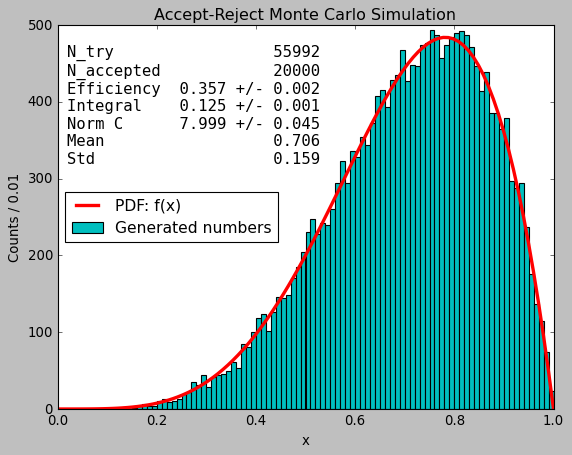

In [1115]:
Nbins= 100
binwidth  = (xmax-xmin)/Nbins

xAxis = np.linspace(xmin,xmax,100)
y = f(xAxis,a=3,C=1) * norm  * N_accepted * binwidth


#plot the histogram of the generated numbers with the function f(x)

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(xAxis,y,c='C2',lw=3, label='PDF: f(x)')
ax.hist(x_accepted,bins=int(Nbins),range=(xmin,xmax),color='C3', label='Generated numbers')
ax.set(xlabel='x',ylabel=r'Counts / {:.2f}'.format(binwidth),title='Accept-Reject Monte Carlo Simulation')
ax.legend(loc='center left',fontsize=14)


# Define the figure text
d2 = {'N_try': N_try,
      'N_accepted': N_accepted,
      'Efficiency': [eff,eff_error],
      'Integral': [integral,eintegral],
      'Norm C': [norm,enorm],
      'Mean': np.mean(x_accepted),
      'Std': np.std(x_accepted,ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.95, text2, ax, fontsize=14)

# fig.savefig("312_Hist_AcceptReject_C.pdf", dpi=600)

#### 3.1.3) Fit a histogram with values from f (x) and determine how many measurements (i.e. values of x) you need in an experiment to determine the value of a with 1% precision.

In [1117]:
# test how big N should be to determine a with 1% precision

N_test = np.arange(100, N_accepted, 100, dtype=int)
a_values = []
a_errors = []
precisions = []
precision_errors = []

for i in N_test:
    counts, bin_edges = np.histogram(x_accepted[:i], bins=Nbins, range=(xmin,xmax), density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    #remove empty bins 
    mask = counts > 0
    counts = counts[mask]
    bin_centers = bin_centers[mask]
    counts_errors = np.sqrt(counts)

    #fit the function
    chi2 = Chi2Regression(f, bin_centers, counts, counts_errors)
    minuit = Minuit(chi2, a=0, C=0)
    minuit.migrad()
    a, C = minuit.values
    a_err, C_err = minuit.errors

    precision = a_err / a
    precision_err = a_err**2 / a**2
    
    a_values.append(a)
    a_errors.append(a_err)
    precisions.append(precision)
    precision_errors.append(precision_err)



In [1118]:
#fit the precision
def precision_of_N(x,p1,p2):
    return p1*x**p2

chi2 = Chi2Regression(precision_of_N, N_test, precisions, precision_errors)
minuit = Minuit(chi2, p1=1, p2=-0.5)
minuit.migrad()
p1, p2 = minuit.values
p1_err, p2_err = minuit.errors
minuit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 165.5                      │              Nfcn = 82               │
│ EDM = 6.92e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ p1   │   1.311   │   0.023   │            │            │         │         │       │
│ 1 │ p2   │  -0.5049  │  0.0018   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────┐
│    │        p1        p2 │
├────┼─────────────────────┤
│ p1 │  0.000523 -4.23e-05 │
│ p2 │ -4.23e-05  3.43e-06 │
└────┴─────────────────────┘

C:\Users\simon\AppData\Local\Temp\ipykernel_12156\151751878.py:3: RuntimeWarning: invalid value encountered in power
  return p1*x**p2


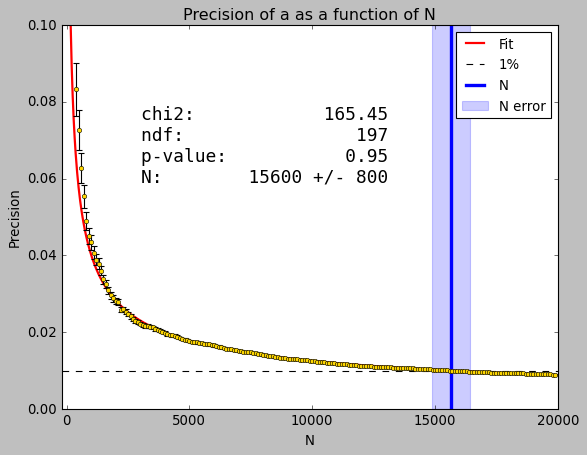

In [1134]:
#solve the equation for N to get the precision of 1%
x , p1_par, p2_par = sp.symbols('x p1 p2')
eq1 = sp.solve(p1_par * x**p2_par-0.01,x)
eq1 = eq1[0]

eq, func , func_err, contrib = Errorpropagation(str(eq1), 'p1 p2')

N_final = func(p1,p2)
N_final_err = func_err(p1,p2,p1_err,p2_err)


xAxis = np.linspace(-200, N_accepted,1000)
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(xAxis,precision_of_N(xAxis,p1,p2),c='C2',lw=2)
ax.errorbar(N_test,precisions,yerr=precision_errors,ecolor='k',mec='k',mfc='gold',fmt='.',ms=8,capsize=3,capthick=1)
ax.axhline(0.01,ls='--',c='k')
ax.axvline(N_final,c='b',lw=3)
ax.axvspan(N_final-N_final_err, N_final+N_final_err, alpha=0.2, color='b')
ax.set(xlim=(-200,N_accepted), ylim= (0,0.1),xlabel='N',ylabel='Precision',title='Precision of a as a function of N')
ax.legend(['Fit','1%','N','N error'],fontsize=12)

#calculate the p-value of the fit 
chi2 = minuit.fval
ndf = len(N_test) - minuit.nfit
p_value = stats.chi2.sf(chi2, ndf)


# Define the figure text
N_final = int(np.round(N_final,-2))
N_final_err = int(np.round(N_final_err,-2))
d2 = {'chi2:': chi2,
    'ndf:': ndf,
    'p-value:': p_value,
    'N:': [N_final,N_final_err],
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=2)
add_text_to_ax(0.16, 0.79, text2, ax, fontsize=16)

# fig.savefig("313_Precision_AcceptReject.pdf", dpi=600)

## IV – Statistical tests:


### 4.1) You measure the grip strength (G in Newton N ) in the dominant and non-dominanthands (based on writting) of 84 persons, to determine if there is a difference. The data is sum-marised in the file www.nbi.dk/∼petersen/data GripStrength.txt.


In [25]:
dataframe = pd.read_csv('data_GripStrength.csv', header=0, index_col=None)
domhand, dom_grip, ndom_grip = dataframe.values.T
dataframe

,DominantHand,DominantGrip(N),NonDominantGrip(N)
0,1.0,293.24,241.50
1,1.0,547.39,552.01
2,0.0,578.85,495.98
3,1.0,342.30,342.18
4,1.0,337.79,347.14
...,...,...,...
79,1.0,335.67,305.39
80,1.0,362.91,336.60
81,1.0,659.39,623.32
82,1.0,292.84,254.46


#### 4.1.1) From this sample, What fraction of persons are right (dominant hand = 1) handed?

In [26]:
frac_right_handed = np.sum(domhand)/len(domhand)
frac_right_handed_err = np.sqrt(frac_right_handed*(1-frac_right_handed)/len(domhand))       # binomial error 

frac_left_handed = 1-frac_right_handed
frac_left_handed_err = np.sqrt(frac_left_handed*(1-frac_left_handed)/len(domhand))          

print('Fraction of right handed people: {:.2f} +- {:.2f}'.format(frac_right_handed,frac_right_handed_err))
print('Fraction of left handed people: {:.2f} +- {:.2f}'.format(frac_left_handed,frac_left_handed_err))

Fraction of right handed people: 0.81 +- 0.04
Fraction of left handed people: 0.19 +- 0.04


#### 4.1.2) What is the mean and standard deviation of the dominant and non-dominant grip strengths?

In [1136]:
dom_grip_mean = np.mean(dom_grip)
dom_grip_std = np.std(dom_grip,ddof=1)
dom_grip_meanstd = np.std(dom_grip,ddof=1)/np.sqrt(len(dom_grip))
ndom_grip_mean = np.mean(ndom_grip)
ndom_grip_std = np.std(ndom_grip,ddof=1)
ndom_grip_meanstd = np.std(ndom_grip,ddof=1)/np.sqrt(len(ndom_grip))

print('Standard deviation of grip strength of dominant hand: {:.2f}'.format(dom_grip_std))
print('Standard deviation of grip strength of non-dominant hand: {:.2f}'.format(ndom_grip_std))
print('Mean grip strength of dominant hand: {:.2f} +- {:.2f}'.format(dom_grip_mean,dom_grip_meanstd))
print('Mean grip strength of non-dominant hand: {:.2f} +- {:.2f}'.format(ndom_grip_mean,ndom_grip_meanstd))


Standard deviation of grip strength of dominant hand: 145.01
Standard deviation of grip strength of non-dominant hand: 138.22
Mean grip strength of dominant hand: 444.93 +- 15.82
Mean grip strength of non-dominant hand: 418.48 +- 15.08


#### 4.1.3) Are the means of the two distributions compatible or different?

In [1135]:
# the null hypothesis is that the distributions means are equal. It is rejected if p-value is smaller than 0.05 significance level

# student t-test
t, p = stats.ttest_ind(dom_grip, ndom_grip, equal_var=False)
print('t-statistic: {:.2f}'.format(t))
print('p-value: {:.2f}'.format(p))

# the null hypothesis cannot be rejected at 95% confidence level


t-statistic: 1.21
p-value: 0.23


#### 4.1.4) What is the mean and standard deviation of the individual differences in grip strengths?

Mean difference in grip strength: 26.45 +- 3.19
Standard deviation of difference in grip strength: 29.21


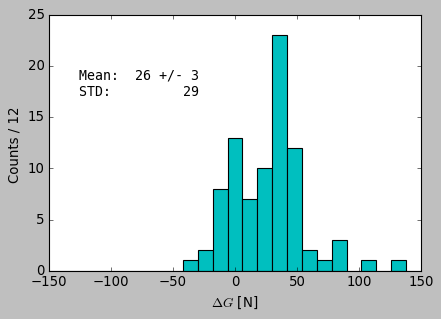

In [1219]:
diff_grip = dom_grip - ndom_grip
diff_grip_mean = np.mean(diff_grip)
diff_grip_std = np.std(diff_grip,ddof=1)
diff_grip_meanstd = np.std(diff_grip,ddof=1)/np.sqrt(len(diff_grip))

print('Mean difference in grip strength: {:.2f} +- {:.2f}'.format(diff_grip_mean,diff_grip_meanstd))
print('Standard deviation of difference in grip strength: {:.2f}'.format(diff_grip_std))

Nbins = 25
xmin, xmax = -150,150
binwidth = (xmax-xmin)/Nbins

fig,ax = plt.subplots(figsize=(6,4))
ax.hist(diff_grip,bins=Nbins, range=(xmin,xmax),color='C3')
ax.set_xlabel(r'$\Delta G$ [N]')
ax.set_ylabel(f'Counts / {binwidth:.0f} ')
# plt.xlim(-100,150)


d = {'Mean:': [diff_grip_mean,diff_grip_meanstd],
    'STD:': diff_grip_std}

# Add figure text
text = nice_string_output(d, extra_spacing=2, decimals=0)
add_text_to_ax(0.08, 0.79, text, ax, fontsize=12)

fig.savefig("414_GripStrength_Diff.pdf", dpi=600)


#### 4.1.5) Is there a statistically significant difference in grip strengths between hands?

In [1137]:
# The null hypothesis is that there is no difference in strength between the dominant and non-dominant hand. It is rejected if p-value is smaller than 0.05 significance level
# If there is no difference in strength between the dominant and non-dominant hand then the difference should be normally distributed with mean 0. 

#student t-test between the difference and a normal distribution with mean 0

t, p = stats.ttest_1samp(diff_grip, 0)

print('t-statistic: {:.2f}'.format(t))
print('p-value: {:.12f}'.format(p))

# the null hypothesis is rejected at 95% confidence level with a p-value of 2e-12 which is way smaller than 0.05 significance level
# the mean of the distribution is 8.3 sigma away from 0 


t-statistic: 8.30
p-value: 0.000000000002


### 4.2) From microscope images, you measure size (S in μm) and intensity (I) of large molecules in a sample, contained in the file www.nbi.dk/∼petersen/data MoleculeTypes.txt.



In [1224]:
dataframe = pd.read_csv('data_MoleculeTypes.csv', header=None, index_col=None)
size, intensity = dataframe.values.T
dataframe

,0,1
0,45.267,0.800
1,43.549,0.736
2,41.326,0.390
3,26.767,0.281
4,24.066,0.220
...,...,...
981,44.660,0.576
982,41.076,0.744
983,42.454,0.657
984,53.994,0.698


#### 4.2.1) Does the molecule size follow a Gaussian distribution? How about when requiring I > 0.50?

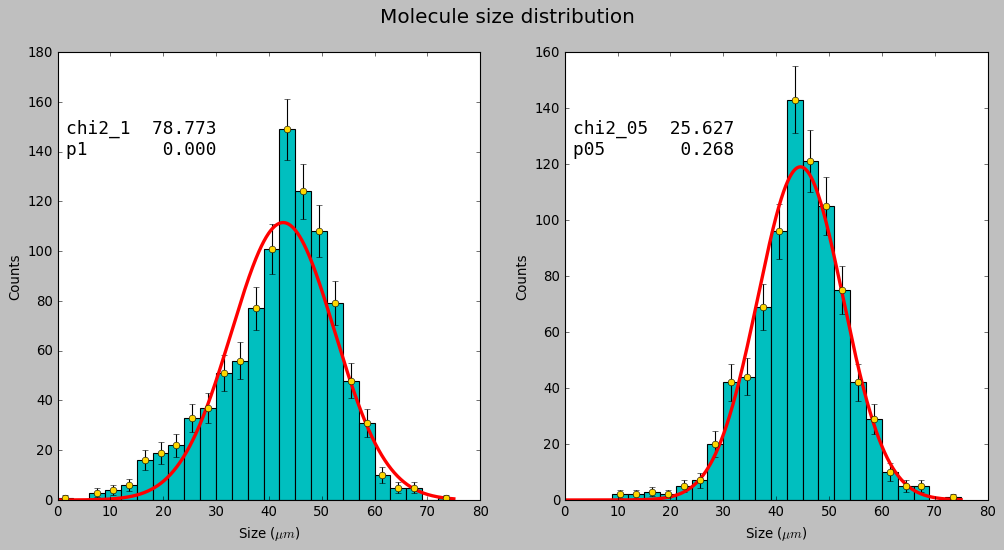

In [1225]:
Nbins = 25 
xmin , xmax = 0, 75
binwidth = (xmax-xmin)/Nbins

size05 = size[intensity>0.5]

#numpy histogram
counts1, bin_edges1 = np.histogram(size,bins=Nbins, range=(xmin,xmax))
counts05, bin_edges05 = np.histogram(size05,bins=Nbins, range=(xmin,xmax))

bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:])/2
bin_centers05 = (bin_edges05[:-1] + bin_edges05[1:])/2


#remove empty bins
mask1 = counts1>0
mask05 = counts05>0
counts1 = counts1[mask1]
counts05 = counts05[mask05]
bin_centers1 = bin_centers1[mask1]
bin_centers05 = bin_centers05[mask05]


#errors on the counts
counts1_err = np.sqrt(counts1)
counts05_err = np.sqrt(counts05)




#fit a gaussian
def gaussian(x, mu, sigma, N ):
    return N * binwidth *stats.norm.pdf(x, mu, sigma)

chi2 = Chi2Regression(gaussian, bin_centers1, counts1, counts1_err)
chi2_05 = Chi2Regression(gaussian, bin_centers05, counts05, counts05_err)

minuit1 = Minuit(chi2, mu=45, sigma=10, N=100)
minuit1.migrad();
minuit05 = Minuit(chi2_05, mu=45, sigma=10, N=100)
minuit05.migrad();

par1 = minuit1.values
par05 = minuit05.values

#chi2 and p-value
chi2_1 = minuit1.fval
chi2_05 = minuit05.fval
ndof = Nbins-3
p1 = stats.chi2.sf(chi2_1, ndof)
p05 = stats.chi2.sf(chi2_05, ndof)



#plot the histogram and the fit
x= np.linspace(xmin,xmax,1000)
fig,ax = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Molecule size distribution', fontsize=18)

ax[0].hist(size,bins=Nbins, range=(xmin,xmax),color = 'C3')
ax[0].errorbar(bin_centers1, counts1, yerr=counts1_err, mec='k',mfc='gold',fmt='o', color='k')
ax[0].plot(x, gaussian(x, *par1), 'r-',lw=3)
ax[0].set(xlabel=r'Size ($\mu m$)', ylabel='Counts')

ax[1].hist(size05,bins=Nbins, range=(xmin,xmax),color = 'C3')
ax[1].errorbar(bin_centers05, counts05, yerr=counts05_err, mec='k',mfc='gold',fmt='o', color='black')
ax[1].plot(x, gaussian(x, *par05), 'r-',lw=3)
ax[1].set(xlabel=r'Size ($\mu m$)', ylabel='Counts')  


# Define the figure text
d1 = {'chi2_1': chi2_1, 
      'p1': p1 }

d2 = {'chi2_05': chi2_05,
        'p05': p05 }

# Add figure text
text1 = nice_string_output(d1, extra_spacing=2, decimals=3)
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text1, ax[0], fontsize=16)
add_text_to_ax(0.02, 0.85, text2, ax[1], fontsize=16)


fig.savefig("421_molecule_distribution.pdf", dpi=600)

In [1226]:

#shapiro-wilk test
w1, p1 = stats.shapiro(size)
w05, p05 = stats.shapiro(size05)    

print('Shapiro-Wilk test:')
print('Uncut: w-value: {:.2f} , '.format(w1),'p-value: {:.11f}'.format(p1))
print('I>05cut: w-value: {:.2f} , '.format(w05),'p-value: {:.11f}'.format(p05))


#anderson-darling test. Null hypothesis is that the data is drawn from a normal distribution
a1, crit1, sig1 = stats.anderson(size, dist='norm')
a05, crit05, sig05 = stats.anderson(size05, dist='norm')

print('Anderson-Darling test:')
print('Uncut: a-value: {:.2f}'.format(a1))
print('critical values: ',crit1)
print('significance levels: ',sig1)
print('I>05cut: a-value: {:.2f}'.format(a05))
print('The null hypothesis is rejected at a 99% confidence level')
print('critical values: ',crit05)
print('significance levels: ',sig05)
print('The null hypothesis is rejected at a 99% confidence level')




Shapiro-Wilk test:
Uncut: w-value: 0.98 ,  p-value: 0.00000000001
I>05cut: w-value: 0.99 ,  p-value: 0.00000855778
Anderson-Darling test:
Uncut: a-value: 7.89
critical values:  [0.574 0.653 0.784 0.914 1.088]
significance levels:  [15.  10.   5.   2.5  1. ]
I>05cut: a-value: 1.78
The null hypothesis is rejected at a 99% confidence level
critical values:  [0.573 0.653 0.783 0.914 1.087]
significance levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis is rejected at a 99% confidence level


#### 4.2.2) Suspecting two different type of molecules, fit the size distribution with two Gaussians.

C:\Users\simon\AppData\Local\Temp\ipykernel_12156\388512162.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, double_gaussian(x, N, f, mu1, sigma, mu2), 'r-',lw=3, color='k')


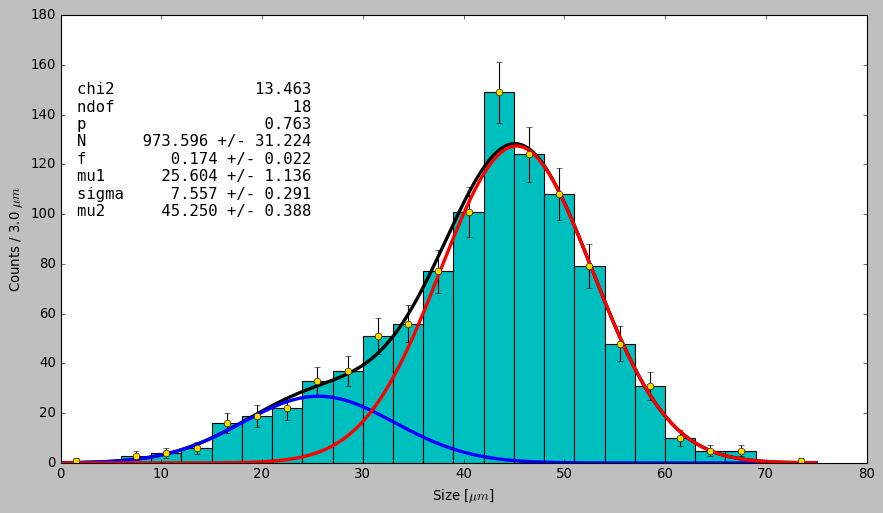

In [1293]:
#Define the function to fit
def gaussian(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)
def double_gaussian(x,N,f, mu1, sigma, mu2):
    return N*binwidth*(f*gaussian(x, mu1, sigma) + (1-f)*gaussian(x, mu2, sigma))


#Fit the histogram
chi2 = Chi2Regression(double_gaussian, bin_centers1, counts1, counts1_err)
minuit = Minuit(chi2,N=1000,f=0, mu1=30, sigma=5, mu2=45)
minuit.migrad()
N, f, mu1 , sigma , mu2 = minuit.values


#Get the chi2 and the p-value
chi2 = minuit.fval
ndof = len(bin_centers1)-5
p = stats.chi2.sf(chi2, ndof)


#plot the histogram and the fit
x= np.linspace(xmin,xmax,1000)
fig,ax = plt.subplots(1,1,figsize=(13,7))
ax.hist(size,bins=Nbins, range=(xmin,xmax),color = 'C3')
ax.plot(x, double_gaussian(x, N, f, mu1, sigma, mu2), 'r-',lw=3, color='k')
ax.errorbar(bin_centers1, counts1, yerr=counts1_err, mec='k',mfc='gold',fmt='o', color='k')
ax.plot(x, N*binwidth*f*gaussian(x, mu1, sigma), '-',lw=3, color='C0')
ax.plot(x, N*binwidth*(1-f)*gaussian(x, mu2, sigma), '-',lw=3, color='C2')
ax.set(xlabel=r'Size [$\mu m$]', ylabel=rf'Counts / {binwidth} $\mu m$')

# Define the figure text
d = { 'chi2': chi2,
        'ndof': ndof,
        'p': p,
        'N': [N, minuit.errors['N']],
        'f': [f, minuit.errors['f']],
        'mu1': [mu1, minuit.errors['mu1']],
        'sigma': [sigma, minuit.errors['sigma']],
        'mu2': [mu2, minuit.errors['mu2']]  }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text, ax, fontsize=14)

# fig.savefig("422_double_gaussian.pdf", dpi=600)

#### 4.2.3) Assuming that the double Gaussian fit is good, what size should you require, to get a 90% clean sample of the new molecule? And how many molecules would you then have?

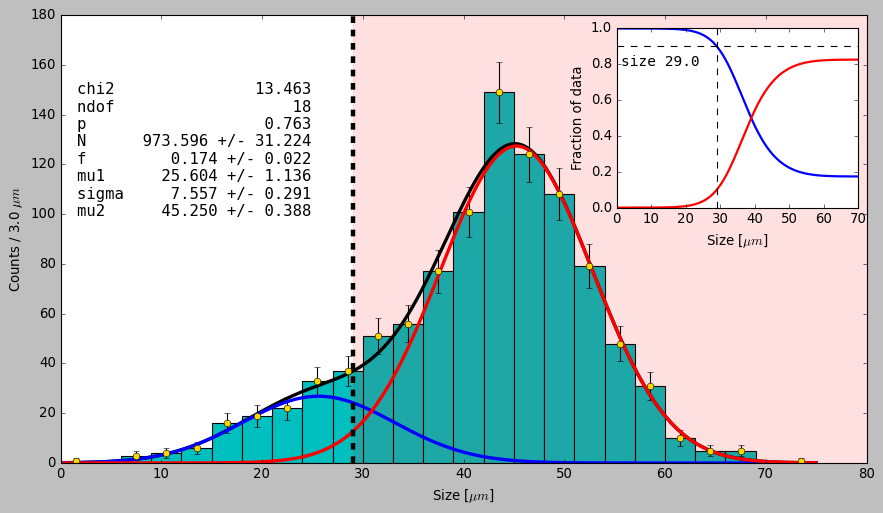

In [1294]:
# Making idealized data according to the two individual gaussian fits and finding where 90% of the data is from the first gaussian 

x = np.linspace(0,70,10000)
y1 = N*binwidth*f*gaussian(x, mu1, sigma)
y2 = N*binwidth*(1-f)*gaussian(x, mu2, sigma)
cum1 = np.cumsum(y1)
cum2 = np.cumsum(y2)
cum_tot = cum1+cum2
frac_cum1 = cum1/cum_tot
frac_cum2 = cum2/cum_tot
index = np.where(frac_cum1>0.9)[0][-1]
x[index]


subax = ax.inset_axes([0.69, 0.57, 0.3, 0.4])
subax.plot(x,frac_cum1, color='C0',lw=2)
subax.plot(x,frac_cum2, color='C2',lw=2)
subax.axvline(x[index],color='k',linestyle='--')
subax.axhline(0.9,color='k',linestyle='--')
subax.set(xlabel=r'Size [$\mu m$]', ylabel='Fraction of data')

ax.axvline(x[index],color='k',linestyle='--',lw=4)
ax.axvspan(x[index],80,color='red',alpha=0.12)

# Define the figure text
d = { 'size': x[index]}

text = nice_string_output(d, extra_spacing=1, decimals=1)
add_text_to_ax(0.02, 0.85, text, subax, fontsize=13)

# fig.savefig("423_90perc_clean.pdf", dpi=600)
fig


In [1281]:
mask = size < x[index]
np.sum(mask)


126

#### 4.2.4) Including the intesity information, how large a 90% pure sample of the new molecule do you think, that you can obtain?

The raw data sample of the new molecule has a size of 151.00 datapoints


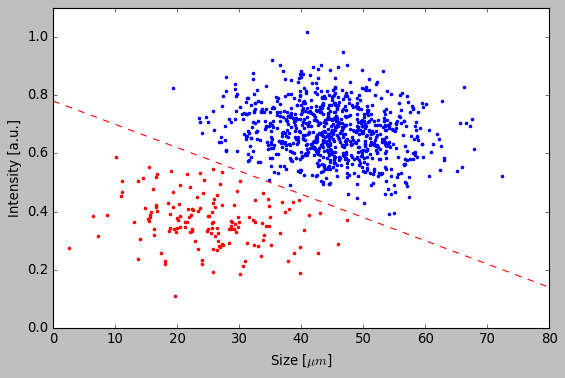

In [1148]:
def cut(x):
    return -0.008*x+0.78

mask = intensity>cut(size)
size1 , intensity1 = size[mask] , intensity[mask]
size2 , intensity2 = size[~mask] , intensity[~mask]

x = np.linspace(0,80,10)
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(x,-0.008*x+0.78,'--r')
ax.scatter(size1,intensity1,marker='.',color='C0')
ax.scatter(size2,intensity2,marker='.',color='C2')
ax.set(xlabel=r'Size [$\mu m$]', ylabel='Intensity [a.u.]', xlim= (0,80), ylim=(0,1.1));

#looking at the 2D intensity/size distribution of the two populations of molecules are very easy to distinguish by eye
#Therefore we can use a simple cut to separate the two populations and then fit the two populations individually
#The samles should be close to pure and a 90% pure samlpe can easily be obtained. 

print('The raw data sample of the new molecule has a size of {:.2f} datapoints'.format(len(size2)))
# fig.savefig("424_2D_distribution.pdf", dpi=600)

The sample of the new molecule has a size of 140 +/- 10 datapoints


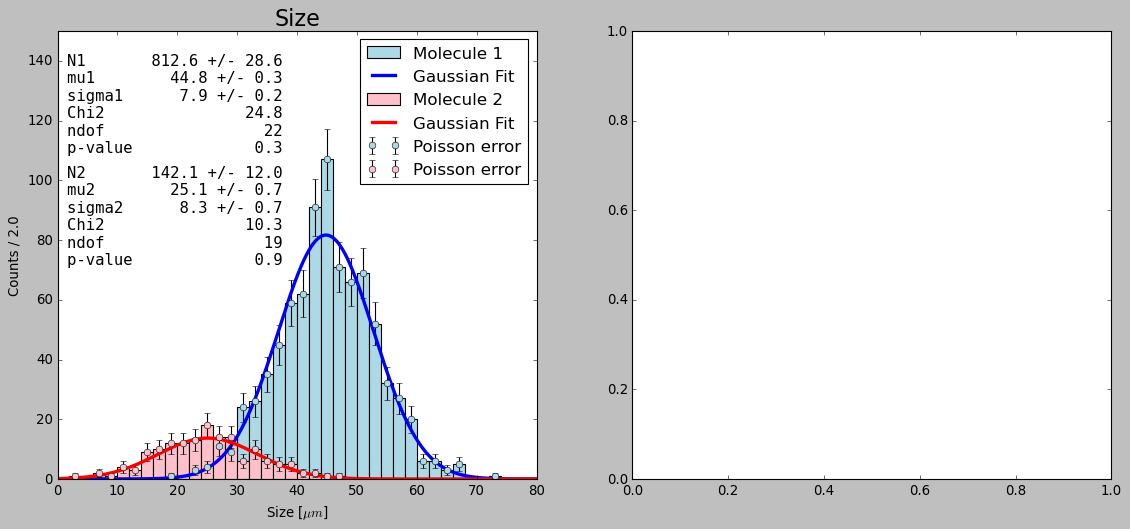

In [1162]:
########   SIZE   ########

Nbins = 50


xmin , xmax =  0, 100

binwidth = (xmax-xmin)/Nbins

counts1, bin_edges1 = np.histogram(size1, bins=Nbins, range=(xmin,xmax))
counts2, bin_edges2 = np.histogram(size2, bins=Nbins, range=(xmin,xmax))

bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:])/2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:])/2

mask1 = counts1>0
mask2 = counts2>0

bin_centers1 = bin_centers1[mask1]
counts1 = counts1[mask1]
bin_centers2 = bin_centers2[mask2]
counts2 = counts2[mask2]

counts1_err = np.sqrt(counts1)
counts2_err = np.sqrt(counts2)


#############################################################################################################


def Gaussian(x, N, mu, sigma):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)


chi2_1 = Chi2Regression(Gaussian, bin_centers1, counts1, counts1_err)
minuit1 = Minuit(chi2_1, N=100, mu=45, sigma=10)
minuit1.migrad();
N1 , mu1 , sigma1 = minuit1.values

chi2_2 = Chi2Regression(Gaussian, bin_centers2, counts2, counts2_err)
minuit2 = Minuit(chi2_2, N=100, mu=30, sigma=10)
minuit2.migrad();
N2 , mu2 , sigma2 = minuit2.values


# ndof and p-value
ndof1 = len(bin_centers1) - 3
ndof2 = len(bin_centers2) - 3
pval1 = stats.chi2.sf(minuit1.fval, ndof1)
pval2 = stats.chi2.sf(minuit2.fval, ndof2)


x = np.linspace(0,80,1000)
fig , ax = plt.subplots(ncols=2,nrows=1,figsize=(17,7))
ax[0].set_title('Size', fontsize=20)
ax[0].set(xlabel=r'Size [$\mu m$]', ylabel=r'Counts / {}'.format(binwidth), xlim=(0,80), ylim=(0,150))


ax[0].hist(size1, bins=Nbins, range=(xmin,xmax), color='lightblue', label='Molecule 1')
ax[0].errorbar(bin_centers1, counts1, yerr=counts1_err, fmt='o',ecolor='k', mec='k',mfc='lightblue',ms=6, label='Poisson error')
ax[0].plot(x, Gaussian(x, N1, mu1, sigma1), color='C0', label='Gaussian Fit', lw=3)

ax[0].hist(size2, bins=Nbins, range=(xmin,xmax), color='pink', label='Molecule 2')
ax[0].errorbar(bin_centers2, counts2, yerr=counts2_err, fmt='o',ecolor='k', mec='k',mfc='pink',ms=6, label='Poisson error')
ax[0].plot(x, Gaussian(x, N2, mu2, sigma2), color='C2', label='Gaussian Fit', lw=3)

ax[0].legend(fontsize=15)

# add text to the plot

d1 = { 'N1': [N1, minuit1.errors['N']],
    'mu1': [mu1, minuit1.errors['mu']],
    'sigma1': [sigma1, minuit1.errors['sigma']],
    'Chi2': minuit1.fval,
    'ndof': ndof1,
    'p-value': pval1}

d2 = { 'N2': [N2, minuit2.errors['N']],
    'mu2': [mu2, minuit2.errors['mu']],
    'sigma2': [sigma2, minuit2.errors['sigma']],
    'Chi2': minuit2.fval,
    'ndof': ndof2,
    'p-value': pval2}

text1 = nice_string_output(d1, extra_spacing=2, decimals=1)
text2 = nice_string_output(d2, extra_spacing=2, decimals=1)

add_text_to_ax(0.02, 0.95, text1, ax[0], fontsize=14)
add_text_to_ax(0.02, 0.70, text2, ax[0], fontsize=14)

print('The sample of the new molecule has a size of 140 +/- 10 datapoints')


The sample of the new molecule has a size of 140 +/- 10 datapoints
Conclusion: the two fits agree within the uncertainties


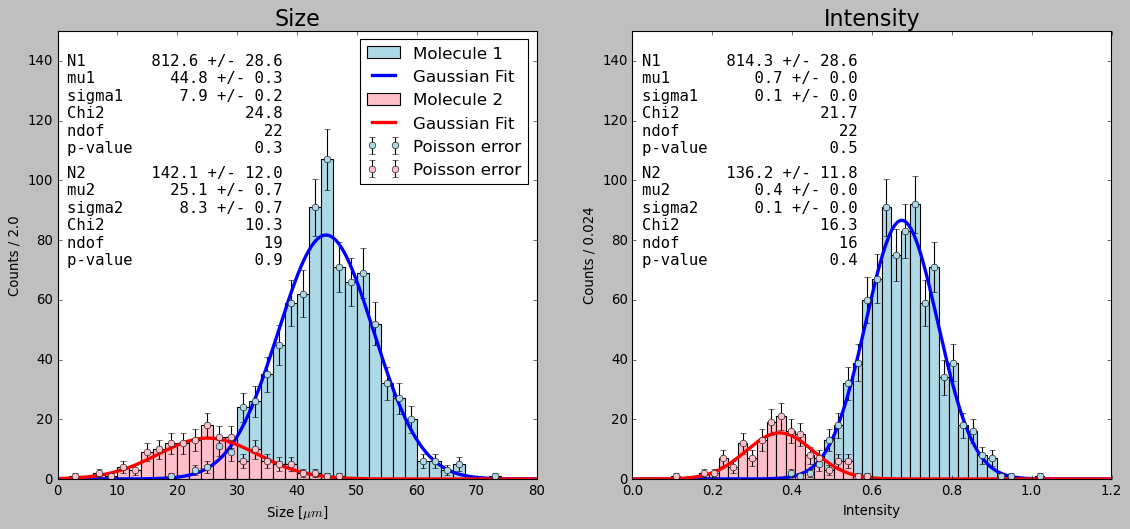

In [1163]:
#########  INTENSITY   ########

Nbins = 50
xmin , xmax =  0, 1.2
binwidth = (xmax-xmin)/Nbins

counts1, bin_edges1 = np.histogram(intensity1, bins=Nbins, range=(xmin,xmax))
counts2, bin_edges2 = np.histogram(intensity2, bins=Nbins, range=(xmin,xmax))

bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:])/2
bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:])/2

mask1 = counts1>0
mask2 = counts2>0

bin_centers1 = bin_centers1[mask1]
counts1 = counts1[mask1]
bin_centers2 = bin_centers2[mask2]
counts2 = counts2[mask2]

counts1_err = np.sqrt(counts1)
counts2_err = np.sqrt(counts2)



#############################################################################################################



def Gaussian(x, N, mu, sigma):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)


chi2_1 = Chi2Regression(Gaussian, bin_centers1, counts1, counts1_err)
minuit1 = Minuit(chi2_1, N=100, mu=0.7, sigma=10)
minuit1.migrad();
N1 , mu1 , sigma1 = minuit1.values

chi2_2 = Chi2Regression(Gaussian, bin_centers2, counts2, counts2_err)
minuit2 = Minuit(chi2_2, N=100, mu=0.3, sigma=10)
minuit2.migrad();
N2 , mu2 , sigma2 = minuit2.values


# ndof and p-value
ndof1 = len(bin_centers1) - 3
ndof2 = len(bin_centers2) - 3
pval1 = stats.chi2.sf(minuit1.fval, ndof1)
pval2 = stats.chi2.sf(minuit2.fval, ndof2)


x = np.linspace(0, 1.2, 1000)
# fig , ax = plt.subplots(figsize=(13,8))
ax[1].set_title('Intensity', fontsize=20)
ax[1].set(xlabel='Intensity', ylabel=r'Counts / {}'.format(binwidth), xlim=(0,1.2), ylim=(0,150))

ax[1].hist(intensity1, bins=Nbins, range=(xmin,xmax), color='lightblue', label='Molecule 1')
ax[1].errorbar(bin_centers1, counts1, yerr=counts1_err, fmt='o',ecolor='k', mec='k',mfc='lightblue',ms=6, label='Poisson error')
ax[1].plot(x, Gaussian(x, N1, mu1, sigma1), color='C0', label='Gaussian Fit', lw=3)

ax[1].hist(intensity2, bins=Nbins, range=(xmin,xmax), color='pink', label='Molecule 2')
ax[1].errorbar(bin_centers2, counts2, yerr=counts2_err, fmt='o',ecolor='k', mec='k',mfc='pink',ms=6, label='Poisson error')
ax[1].plot(x, Gaussian(x, N2, mu2, sigma2), color='C2', label='Gaussian Fit', lw=3)

# ax[1].legend(fontsize=15)

# add text to the plot

d1 = { 'N1': [N1, minuit1.errors['N']],
    'mu1': [mu1, minuit1.errors['mu']],
    'sigma1': [sigma1, minuit1.errors['sigma']],
    'Chi2': minuit1.fval,
    'ndof': ndof1,
    'p-value': pval1}

d2 = { 'N2': [N2, minuit2.errors['N']],
    'mu2': [mu2, minuit2.errors['mu']],
    'sigma2': [sigma2, minuit2.errors['sigma']],
    'Chi2': minuit2.fval,
    'ndof': ndof2,
    'p-value': pval2}

text1 = nice_string_output(d1, extra_spacing=2, decimals=1)
text2 = nice_string_output(d2, extra_spacing=2, decimals=1)

add_text_to_ax(0.02, 0.95, text1, ax[1], fontsize=14)
add_text_to_ax(0.02, 0.70, text2, ax[1], fontsize=14)

print('The sample of the new molecule has a size of 140 +/- 10 datapoints')
print('Conclusion: the two fits agree within the uncertainties')

fig.savefig("424_2D_complete_seperation.pdf", dpi=600)
fig

## V - Fitting data:


### 5.1) You are studying the growth of an algae type, by considering the area it covers (Ain cm2) as a function of time (t in days): www.nbi.dk/∼petersen/data AlgaeGrowth.txt. The initially assumed uncertainty on A is σA = 45cm2.

In [1315]:
dataframe = pd.read_csv('data_AlgaeGrowth.csv',header=None)
time, area, err_area = dataframe.values.T
dataframe

,0,1,2
0,0.35,1470.40,45.0
1,0.57,1426.93,45.0
2,0.60,1466.84,45.0
3,0.90,1580.44,45.0
4,1.08,1626.27,45.0
...,...,...,...
85,11.71,1974.83,45.0
86,11.85,2044.98,45.0
87,11.93,2059.38,45.0
88,12.26,2014.04,45.0


#### 5.1.1) Plot the data, and fit it with a third degree polynomial. Is the fit good?

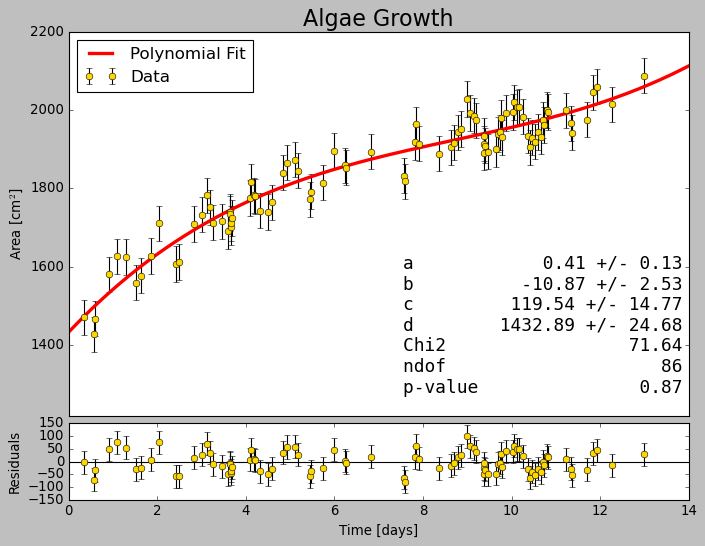

In [1332]:
fig , ax = plt.subplots(figsize=(10,6))
ax.set_title('Algae Growth', fontsize=20)
ax.set(ylabel=r'Area [cm$^2$]')
ax.errorbar(time, area, yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6, label='Data')


#fit a third order polynomial

def polynomial(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

chi2 = Chi2Regression(polynomial, time, area, err_area)
minuit = Minuit(chi2, a=0.4, b=-10, c=120, d=1400)
minuit.migrad()
a1, b1, c1, d1 = minuit.values

# ndof and p-value
ndof1 = len(time) - 4
pval = stats.chi2.sf(minuit.fval, ndof1)

# plot the fit
x = np.linspace(0, 14, 1000)
ax.plot(x, polynomial(x, a1, b1, c1, d1), color='C2', label='Polynomial Fit', lw=3)
ax.legend(loc='upper left',fontsize=15)

# add a residual panel
residuals = area - polynomial(time, a1, b1, c1, d1)

ax.set_xticks([])
ax.set_ylim(1220,2200)
ax2 = ax.inset_axes([0, -0.22, 1, 0.2])
ax2.axhline(0, color='k', lw=1)
ax2.errorbar(time, area - polynomial(time, a1, b1, c1, d1), yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6)
ax2.set(xlabel='Time [days]', ylabel='Residuals', xlim=(0,14))


# add text to the plot
d = { 'a': [a1, minuit.errors['a']],
    'b': [b1, minuit.errors['b']],
    'c': [c1, minuit.errors['c']],
    'd': [d1, minuit.errors['d']],
    'Chi2': minuit.fval,
    'ndof': ndof1,
    'p-value': pval}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.54, 0.42, text, ax, fontsize=16)


# fig.tight_layout()
# fig.savefig("511_algae_3degree.pdf", dpi=700, bbox_inches='tight')


#### 5.1.2) Do a runs test on the fit residuals. Does the data seem randomly distributed around the fit?

In [606]:
#Do a runs test on the residuals without stats

def runs_test(res):
    n = len(res)
    runs, pos, neg = 0 ,0 ,0
    
    for i in range(n):
        if res[i] > 0:
            pos += 1
        else:
            neg += 1
        if i == 0:
            continue
        if res[i]*res[i-1] < 0:                 # if the signs are different add run
            runs += 1

    runs_exp = (2*pos*neg)/(pos+neg) + 1
    std = np.sqrt(2*pos*neg*(2*pos*neg-pos-neg)/((pos+neg)**2*(pos+neg-1)))
    z = (runs - runs_exp)/std
    p = stats.norm.sf(abs(z))*2

    return runs, runs_exp, std, z, p


runs, runs_exp, std, z, p = runs_test(residuals)

print('Number of runs:', runs)
print('Expected number of runs:', np.round(runs_exp,2))
print('Standard deviation:', np.round(std,2))
print('z-value:', np.round(z,2))
print('p-value:', np.round(p,6))
print('Conclusion: the residuals are not random')

Number of runs: 27
Expected number of runs: 45.8
Standard deviation: 4.7
z-value: -4.0
p-value: 6.2e-05
Conclusion: the residuals are not random


#### 5.1.3) You suspect, that there is a day/night variation. Include a multiplicative small oscillation term in your fit, and see if you can improve on the fit and the runs test p-value.

Number of runs: 43
Expected number of runs: 45.8
Standard deviation: 4.7
z-value: -0.6
p-value: 0.550964
Conclusion: the p-value is way better than before and definitely within reason


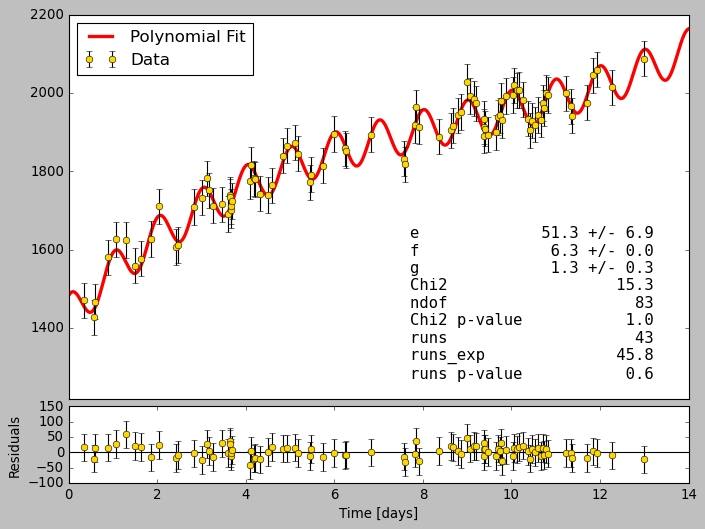

In [1336]:
def polynomial2(x, e, f, g):
    return polynomial(x,a1,b1,c1,d1) + e*np.sin(f*x+g)

chi2 = Chi2Regression(polynomial2, time, area, err_area)
minuit = Minuit(chi2, e=50, f=6, g=1)
minuit.migrad()
e1, f1, g1 = minuit.values

# ndof and p-value
ndof2 = ndof1 - 3
pval = stats.chi2.sf(minuit.fval, ndof2)

# plot the fit
x = np.linspace(0, 14, 1000)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x, polynomial2(x, e1,f1,g1), color='C2', label='Polynomial Fit', lw=3)
ax.errorbar(time, area, yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6, label='Data')
ax.legend(loc='upper left',fontsize=15)
ax.set_xticks([])
ax.set_ylim(1220,2200)

# add a residual panel
residuals = area - polynomial2(time, e1,f1,g1)
ax2 = ax.inset_axes([0, -0.22, 1, 0.2])
ax2.axhline(0, color='k', lw=1)
ax2.errorbar(time, area - polynomial2(time, e1,f1,g1), yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6)
ax2.set(xlabel='Time [days]', ylabel='Residuals', xlim=(0,14))


#Do a runs test on the new residuals
residuals = area - polynomial2(time, e1,f1,g1)

runs, runs_exp, std_runs, z_runs, p_runs = runs_test(residuals)




# add text to the plot
d = { 'e': [e1, minuit.errors['e']],
    'f': [f1, minuit.errors['f']],
    'g': [g1, minuit.errors['g']],
    'Chi2': minuit.fval,
    'ndof': ndof2,
    'Chi2 p-value': pval,
    'runs': runs,
    'runs_exp': runs_exp,   
    'runs p-value': p_runs,
    }

text = nice_string_output(d, extra_spacing=2, decimals=1)   
add_text_to_ax(0.55, 0.45, text, ax, fontsize=14)



print('Number of runs:', runs)
print('Expected number of runs:', np.round(runs_exp,2))
print('Standard deviation:', np.round(std_runs,2))
print('z-value:', np.round(z_runs,2))
print('p-value:', np.round(p_runs,6))
print('Conclusion: the p-value is way better than before and definitely within reason')

# fig.savefig("513_algae_3d_oscil.pdf", dpi=600, bbox_inches='tight')

#### 5.1.4) Is it realistic that the uncertainties are in reality about half of those stated?

Number of runs: 43
Expected number of runs: 45.8
Standard deviation: 4.7
z-value: -0.6
p-value: 0.55
Runs Test conclusion: the p-value is way better than before and definitely within reason
Conclusion: the p-value is high but not unreasonable. => the original uncertainties are probably overestimated


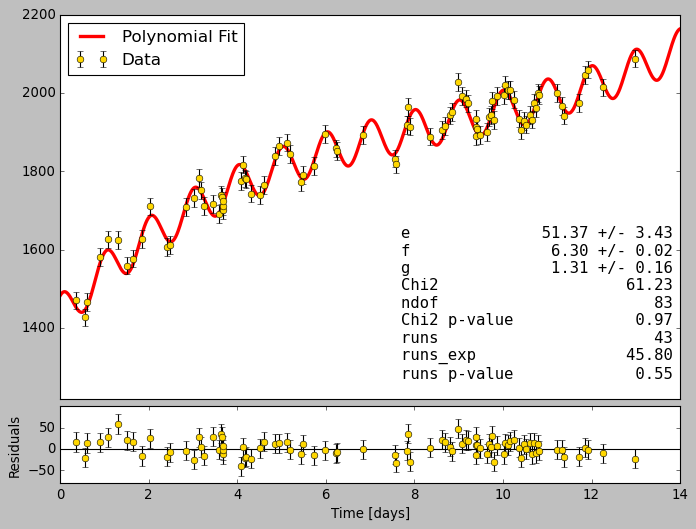

In [1339]:
#The same test as above but with the uncertainties halved
err_area = err_area/2

chi2 = Chi2Regression(polynomial2, time, area, err_area)
minuit = Minuit(chi2, e=50, f=6, g=1)
minuit.migrad()
e1, f1, g1 = minuit.values

# ndof and p-value
ndof2 = ndof1 - 3
pval = stats.chi2.sf(minuit.fval, ndof2)

# plot the fit
x = np.linspace(0, 14, 1000)
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(x, polynomial2(x, e1,f1,g1), color='C2', label='Polynomial Fit', lw=3)
ax.errorbar(time, area, yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6, label='Data')
ax.legend(loc='upper left',fontsize=15)
ax.set_xticks([])
ax.set_ylim(1220,2200)

# add a residual panel
residuals = area - polynomial2(time, e1,f1,g1)
ax2 = ax.inset_axes([0, -0.22, 1, 0.2])
ax2.axhline(0, color='k', lw=1)
ax2.errorbar(time, area - polynomial2(time, e1,f1,g1), yerr=err_area, fmt='o',ecolor='k', mec='k',mfc='gold',ms=6)
ax2.set(xlabel='Time [days]', ylabel='Residuals', xlim=(0,14),yticks=[-50,0,50])

#Do a runs test on the new residuals
residuals = area - polynomial2(time, e1,f1,g1)

runs, runs_exp, std_runs, z_runs, p_runs = runs_test(residuals)


# add text to the plot
d = { 'e': [e1, minuit.errors['e']],
    'f': [f1, minuit.errors['f']],
    'g': [g1, minuit.errors['g']],
    'Chi2': minuit.fval,
    'ndof': ndof2,
    'Chi2 p-value': pval,
    'runs': runs,
    'runs_exp': runs_exp,   
    'runs p-value': p_runs,
    }

text = nice_string_output(d, extra_spacing=3, decimals=2)   
add_text_to_ax(0.55, 0.45, text, ax, fontsize=14)

#Do a runs test on the new residuals
residuals = area - polynomial2(time, e1,f1,g1)

runs, runs_exp, std, z, p = runs_test(residuals)

print('Number of runs:', runs)
print('Expected number of runs:', np.round(runs_exp,2))
print('Standard deviation:', np.round(std,2))
print('z-value:', np.round(z,2))
print('p-value:', np.round(p,2))
print('Runs Test conclusion: the p-value is way better than before and definitely within reason')
err_area = err_area*2           #reset the uncertainties to their original value


print('Conclusion: the p-value is high but not unreasonable. => the original uncertainties are probably overestimated')
# fig.savefig("514_algae_05error.pdf", dpi=600, bbox_inches='tight')


### 5.2)  In the centennial of Bohr’s Nobel prize, you decide to test his atomic model, and measure the spectral lines of hydrogen in the infrared spectrum 1200-2200nm, where you would expect see some of the n1 = 3 and n1 = 4 lines for 1 λ = R∞( 1n21− 1n22), where R∞ = 1.09677×107m−1. Your measurements are in the file www.nbi.dk/∼petersen/data BohrHypothesis.txt, where you have recorded wavelength (λ in nm) and supply voltage (U in V).

In [740]:
dataframe = pd.read_csv('data_BohrHypothesis.csv', header=None, index_col=None)
wavel, voltage = dataframe.values.T

#uncertainties
wavel_err = np.sqrt(wavel)
voltage_err = np.sqrt(voltage)
dataframe['wavel_err'] = wavel_err
dataframe['voltage_err'] = voltage_err

# dataframe

#### 5.2.1) Fit the two prominent known n1 = 3 peaks, which should be at 1875.637nm and 1282.174nm.

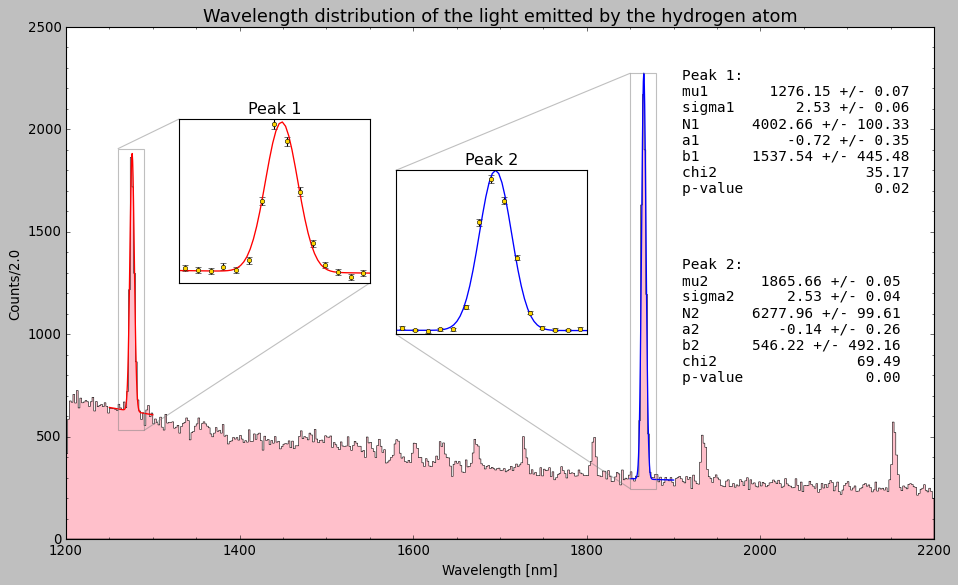

In [1354]:
Nbins = 500
xmin , xmax = 1200, 2200
binwidth = (xmax-xmin)/Nbins

counts , bin_edges = np.histogram(wavel, bins=Nbins, range=(xmin,xmax))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


fig, ax = plt.subplots(figsize=(14,8))
ax.hist(wavel, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='pink',lw=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title('Wavelength distribution of the light emitted by the hydrogen atom', fontsize=16)
ax.minorticks_on() 


# fitting function 
def lin_gauss(x, mu, sigma, N, a, b):
    return N*binwidth*stats.norm.pdf(x, mu, sigma) + a*x + b

# fit the peak at 1282 nm
xmin1 , xmax1 = 1250, 1300
mask1 = (bin_centers>xmin1) & (bin_centers<xmax1)
bins1 = bin_centers[mask1]
counts1 = counts[mask1]
counts1_err = np.sqrt(counts1)

chi2_1 = Chi2Regression(lin_gauss, bins1, counts1, counts1_err)
minuit_1 = Minuit(chi2_1, mu=1282, sigma=1, N=100, a=0, b=0)
minuit_1.migrad()
mu1, sigma1, N1, a1, b1 = minuit_1.values


# fit the peak at 1875 nm
xmin2 , xmax2 = 1850, 1900
mask2 = (bin_centers>xmin2) & (bin_centers<xmax2)
bins2 = bin_centers[mask2]
counts2 = counts[mask2]
counts2_err = np.sqrt(counts2)

chi2_2 = Chi2Regression(lin_gauss, bins2, counts2, counts2_err)
minuit_2 = Minuit(chi2_2, mu=1875, sigma=1, N=100, a=0, b=0)
minuit_2.migrad()
mu2, sigma2, N2, a2, b2 = minuit_2.values

# ndof and p-value
ndof1 = len(bins1) - 5
ndof2 = len(bins2) - 5
chi2_1 = minuit_1.fval
chi2_2 = minuit_2.fval
pval1 = stats.chi2.sf(chi2_1, ndof1)
pval2 = stats.chi2.sf(chi2_2, ndof2)


# plot the fit
x1 = np.linspace(xmin1, xmax1, 100)
x2 = np.linspace(xmin2, xmax2, 100)

ax.plot(x1, lin_gauss(x1, mu1, sigma1, N1, a1, b1), color='C2', lw=1.2, label='Gaussian Fit')
ax.plot(x2, lin_gauss(x2, mu2, sigma2, N2, a2, b2), color='C0', lw=1.2)


#add zoomed in inset
axins1 = ax.inset_axes([0.13, 0.5, 0.22, 0.32])
axins1.errorbar(bins1, counts1, yerr=counts1_err, fmt='o',ecolor='k', mec='k',mfc='gold',ms=4)
axins1.plot(x1, lin_gauss(x1, mu1, sigma1, N1, a1, b1), color='C2', lw=1.2)
axins1.set(xlim=(1260,1290), title='Peak 1',xticks=[],yticks=[])
ax.indicate_inset_zoom(axins1)

axins2 = ax.inset_axes([0.38, 0.4, 0.22, 0.32])
axins2.errorbar(bins2, counts2, yerr=counts2_err, fmt='o',ecolor='k', mec='k',mfc='gold',ms=4)
axins2.plot(x2, lin_gauss(x2, mu2, sigma2, N2, a2, b2), color='C0', lw=1.2)
axins2.set(xlim=(1850,1880), title='Peak 2',xticks=[],yticks=[])
ax.indicate_inset_zoom(axins2)


#add text to the plot
d1 = {'Peak 1:':'',
    'mu1': [mu1, minuit_1.errors['mu']],
    'sigma1': [sigma1, minuit_1.errors['sigma']],
    'N1': [N1, minuit_1.errors['N']],
    'a1': [a1, minuit_1.errors['a']],
    'b1': [b1, minuit_1.errors['b']],
    'chi2': chi2_1,
    'p-value': pval1}

d2 = { 'Peak 2:':'',
    'mu2': [mu2, minuit_2.errors['mu']],
    'sigma2': [sigma2, minuit_2.errors['sigma']],
    'N2': [N2, minuit_2.errors['N']],
    'a2': [a2, minuit_2.errors['a']],
    'b2': [b2, minuit_2.errors['b']],
    'chi2': chi2_2,
    'p-value': pval2}


text1 = nice_string_output(d1, extra_spacing=1, decimals=2)
text2 = nice_string_output(d2, extra_spacing=1, decimals=2)
add_text_to_ax(0.71, 0.92, text1, ax, fontsize=13)
add_text_to_ax(0.71, 0.55, text2, ax, fontsize=13)  

# fig.savefig('521_wavelength_n3_peaks.pdf', dpi=600, bbox_inches='tight')

#### 5.2.2) Are the two peaks Gaussian? And if you assume so, are their resolutions (σ) consistent?

In [1350]:

#shapiro-wilk test
w1, p1 = stats.shapiro(bins1)
w2, p2 = stats.shapiro(bins2)    

print('Shapiro-Wilk test:')
print('Peak1: w-value: {:.2f} , '.format(w1),'p-value: {:.11f}'.format(p1))
print('Peak2: w-value: {:.2f} , '.format(w2),'p-value: {:.11f}'.format(p2))


#anderson-darling test. Null hypothesis is that the data is drawn from a normal distribution
a1, crit1, sig1 = stats.anderson(bins1, dist='norm')
a2, crit2, sig2 = stats.anderson(bins2, dist='norm')

print('Anderson-Darling test:')
print('Peak1: a-value: {:.2f}'.format(a1))
print('critical values: ',crit1)
print('significance levels: ',sig1)
print('Peak2: a-value: {:.2f}'.format(a2))
print('The null hypothesis cannot be rejected even at a 85% confidence level')
print('critical values: ',crit2)
print('significance levels: ',sig2)
print('The null hypothesis cannot be rejected even at a 85% confidence level')


print('The resulution of the guassian fits is of binwidth 2 is pretty consistent with sigma of 2.53')

Shapiro-Wilk test:
Peak1: w-value: 0.96 ,  p-value: 0.38665100932
Peak2: w-value: 0.96 ,  p-value: 0.38665381074
Anderson-Darling test:
Peak1: a-value: 0.27
critical values:  [0.514 0.586 0.703 0.82  0.975]
significance levels:  [15.  10.   5.   2.5  1. ]
Peak2: a-value: 0.27
The null hypothesis cannot be rejected even at a 85% confidence level
critical values:  [0.514 0.586 0.703 0.82  0.975]
significance levels:  [15.  10.   5.   2.5  1. ]
The null hypothesis cannot be rejected even at a 85% confidence level
The resulution of the guassian fits is of binwidth 2 is pretty consistent with sigma of 2.53


#### 5.2.3) Given your observed peak positions, how would you (linearly) calibrate the scale?

The corrections are:  [6.0219281696770395, 9.977513357637463]


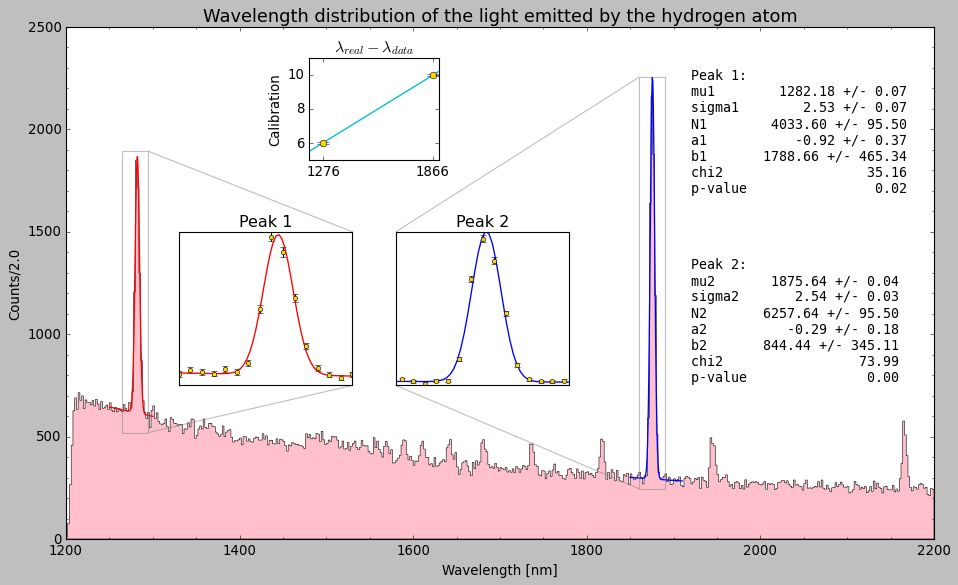

In [1483]:
theo_values = [1282.174, 1875.637]
data_values = [mu1, mu2]
corrections = [theo_values[0]-mu1, theo_values[1]-mu2]
print('The corrections are: ', corrections)

def linear (x, a, b):
    return a*x + b

chi2_lin = Chi2Regression(linear, data_values, corrections, [1,1])
minuit_lin = Minuit(chi2_lin, a=0, b=0)
minuit_lin.migrad()
a_cali, b_cali = minuit_lin.values

#projected the data onto the linear fit for a calibrated new x-axis
Lin_calibration =  linear(wavel, a_cali, b_cali)
new_wavel = wavel + Lin_calibration
#  = wavel / (1 + Lin_calibration)









Nbins = 500
xmin , xmax = 1200, 2200
binwidth = (xmax-xmin)/Nbins

counts , bin_edges = np.histogram(new_wavel, bins=Nbins, range=(xmin,xmax))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


fig, ax = plt.subplots(figsize=(14,8))
ax.hist(new_wavel, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='pink',lw=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title('Wavelength distribution of the light emitted by the hydrogen atom', fontsize=16)
ax.minorticks_on() 


# fitting function 
def lin_gauss(x, mu, sigma, N, a, b):
    return N*binwidth*stats.norm.pdf(x, mu, sigma) + a*x + b

# fit the peak at 1282 nm
xmin1 , xmax1 = 1250, 1300
mask1 = (bin_centers>xmin1) & (bin_centers<xmax1)
bins1 = bin_centers[mask1]
counts1 = counts[mask1]
counts1_err = np.sqrt(counts1)

chi2_1 = Chi2Regression(lin_gauss, bins1, counts1, counts1_err)
minuit_cali1 = Minuit(chi2_1, mu=1282, sigma=1, N=1500, a=0, b=0)
minuit_cali1.migrad()
mu1_cali, sigma1_cali, N1_cali, a1_cali, b1_cali = minuit_cali1.values


# fit the peak at 1875 nm
xmin2 , xmax2 = 1850, 1910
mask2 = (bin_centers>xmin2) & (bin_centers<xmax2)
bins2 = bin_centers[mask2]
counts2 = counts[mask2]
counts2_err = np.sqrt(counts2)

chi2_2 = Chi2Regression(lin_gauss, bins2, counts2, counts2_err)
minuit_cali2 = Minuit(chi2_2, mu=1875, sigma=1, N=1500, a=0, b=0)
minuit_cali2.migrad()
mu2_cali, sigma2_cali, N2_cali, a2_cali, b2_cali = minuit_cali2.values

# ndof and p-value
ndof1 = len(bins1) - 5
ndof2 = len(bins2) - 5
chi2_1 = minuit_cali1.fval
chi2_2 = minuit_cali2.fval
pval1 = stats.chi2.sf(chi2_1, ndof1)
pval2 = stats.chi2.sf(chi2_2, ndof2)


# plot the fit
x1 = np.linspace(xmin1, xmax1, 100)
x2 = np.linspace(xmin2, xmax2, 100)

ax.plot(x1, lin_gauss(x1, mu1_cali, sigma1_cali, N1_cali, a1_cali, b1_cali), color='C2', lw=1.2, label='Gaussian Fit')
ax.plot(x2, lin_gauss(x2, mu2_cali, sigma2_cali, N2_cali, a2_cali, b2_cali), color='C0', lw=1.2, label='Gaussian Fit')



#add zoomed in inset
axins1 = ax.inset_axes([0.13, 0.3, 0.2, 0.3])
axins1.errorbar(bins1, counts1, yerr=counts1_err, fmt='o',ecolor='k', mec='k',mfc='gold',ms=4)
axins1.plot(x1, lin_gauss(x1, mu1_cali, sigma1_cali, N1_cali, a1_cali, b1_cali), color='C2', lw=1.2)
axins1.set(xlim=(1265,1295), title='Peak 1',xticks=[],yticks=[])
ax.indicate_inset_zoom(axins1)

axins2 = ax.inset_axes([0.38, 0.3, 0.2, 0.3])
axins2.errorbar(bins2, counts2, yerr=counts2_err, fmt='o',ecolor='k', mec='k',mfc='gold',ms=4)
axins2.plot(x2, lin_gauss(x2, mu2_cali, sigma2_cali, N2_cali, a2_cali, b2_cali), color='C0', lw=1.2)
axins2.set(xlim=(1860,1890), title='Peak 2',xticks=[],yticks=[])
ax.indicate_inset_zoom(axins2)

x_cali = np.linspace(1200, 1900, 100)
axcali = ax.inset_axes([0.28, 0.74, 0.15, 0.20])
axcali.errorbar(data_values, corrections, yerr=[minuit_1.errors['mu'],minuit_2.errors['mu']],fmt='o', mec='k',mfc='gold', capsize = 5,label='Data')
axcali.plot(x_cali, linear(x_cali, a_cali, b_cali), color='C3', lw=1.2, label='Linear Fit')
axcali.set(title=r'$\lambda_{real} - \lambda_{data}$', xticks=[mu1,mu2], yticks=[6,8,10],xticklabels=[r'{:.0f}'.format(mu1),r'{:.0f}'.format(mu2),], yticklabels=['6','8','10'])
axcali.set_ylabel('Calibration', fontsize=12)



#add text to the plot
d1 = {'Peak 1:':'',
    'mu1': [mu1_cali, minuit_cali1.errors['mu']],
    'sigma1': [sigma1, minuit_cali1.errors['sigma']],
    'N1': [N1_cali, minuit_cali2.errors['N']],
    'a1': [a1_cali, minuit_cali1.errors['a']],
    'b1': [b1_cali, minuit_cali1.errors['b']],
    'chi2': chi2_1,
    'p-value': pval1}

d2 = { 'Peak 2:':'',
    'mu2': [mu2_cali, minuit_cali2.errors['mu']],
    'sigma2': [sigma2_cali, minuit_cali2.errors['sigma']],
    'N2': [N2_cali, minuit_cali2.errors['N']],
    'a2': [a2_cali, minuit_cali2.errors['a']],
    'b2': [b2_cali, minuit_cali2.errors['b']],
    'chi2': chi2_2,
    'p-value': pval2}


text1 = nice_string_output(d1, extra_spacing=2, decimals=2)
text2 = nice_string_output(d2, extra_spacing=2, decimals=2)
add_text_to_ax(0.72, 0.92, text1, ax, fontsize=12)
add_text_to_ax(0.72, 0.55, text2, ax, fontsize=12)  

# fig.savefig('523_wavelenght_calibration.pdf', bbox_inches='tight', dpi=600)

#### 5.2.4) See how many (significant) peaks beyond the two n1 = 3 peaks you can find.

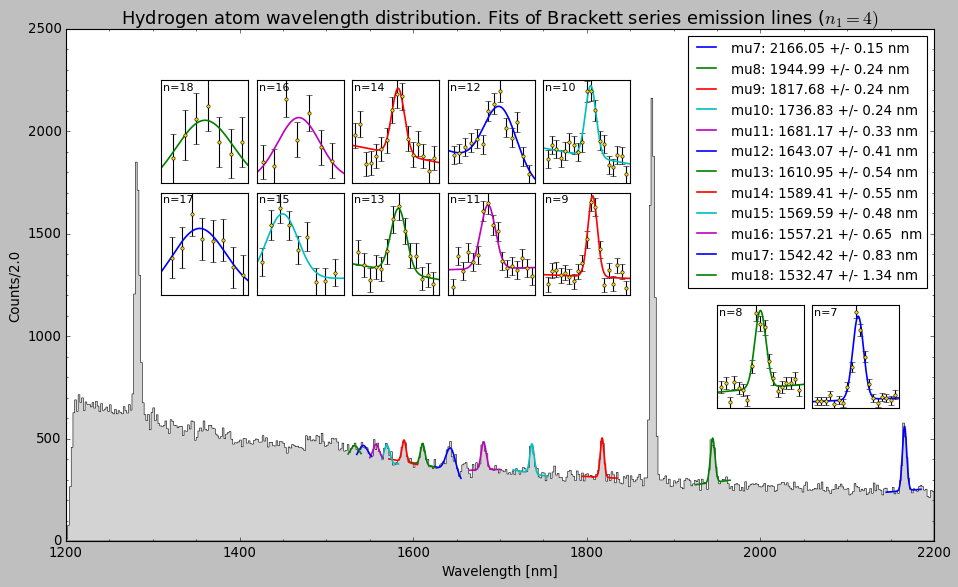

In [1363]:
Nbins = 500
xmin , xmax = 1200, 2200
binwidth = (xmax-xmin)/Nbins
counts , bin_edges = np.histogram(new_wavel, bins=Nbins, range=(xmin,xmax))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

fig, ax = plt.subplots(figsize=(14,8))
ax.hist(new_wavel, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='lightgrey',lw=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title(r'Hydrogen atom wavelength distribution. Fits of Brackett series emission lines ($n_1=4)$', fontsize=16)
ax.minorticks_on() 

def lin_gauss(x, mu, sigma, N, a, b):
    return N*binwidth*stats.norm.pdf(x, mu, sigma) + a*x + b



######################## fitting the Brackett series peaks ########################

# n2=7 peak 
xmin7 , xmax7 = 2145, 2185
mask7 = (bin_centers>xmin7) & (bin_centers<xmax7)
bins7 , counts7 , counts_err7 = bin_centers[mask7] , counts[mask7] , np.sqrt(counts[mask7])
chi2_7 = Chi2Regression(lin_gauss, bins7, counts7, counts_err7)
minuit_7 = Minuit(chi2_7, mu=2160, sigma=1, N=1000, a=0, b=0)
minuit_7.migrad()
mu7, sigma7, N7, a7, b7 = minuit_7.values
mu7err, sigma7err, N7err, a7err, b7err = minuit_7.errors
chi2_7 = minuit_7.fval
pval7 = stats.chi2.sf(chi2_7, len(bins7) - 5)

# n2=8 peak
xmin8 , xmax8 = 1925, 1965
mask8 = (bin_centers>xmin8) & (bin_centers<xmax8)
bins8 , counts8 , counts_err8 = bin_centers[mask8] , counts[mask8] , np.sqrt(counts[mask8])
chi2_8 = Chi2Regression(lin_gauss, bins8, counts8, counts_err8)
minuit_8 = Minuit(chi2_8, mu=1945, sigma=1, N=1000, a=0, b=0)
minuit_8.migrad()
mu8, sigma8, N8, a8, b8 = minuit_8.values
mu8err, sigma8err, N8err, a8err, b8err = minuit_8.errors
chi2_8 = minuit_8.fval
pval8 = stats.chi2.sf(chi2_8, len(bins8) - 5)

# n2=9 peak
xmin9 , xmax9 = 1795, 1835
mask9 = (bin_centers>xmin9) & (bin_centers<xmax9)
bins9 , counts9 , counts_err9 = bin_centers[mask9] , counts[mask9] , np.sqrt(counts[mask9])
chi2_9 = Chi2Regression(lin_gauss, bins9, counts9, counts_err9)
minuit_9 = Minuit(chi2_9, mu=1817, sigma=1, N=1000, a=0, b=0)
minuit_9.migrad()
mu9, sigma9, N9, a9, b9 = minuit_9.values
mu9err, sigma9err, N9err, a9err, b9err = minuit_9.errors
chi2_9 = minuit_9.fval
pval9 = stats.chi2.sf(chi2_9, len(bins9) - 5)

# n2=10 peak
xmin10 , xmax10 = 1715, 1755
mask10 = (bin_centers>xmin10) & (bin_centers<xmax10)
bins10 , counts10 , counts_err10 = bin_centers[mask10] , counts[mask10] , np.sqrt(counts[mask10])
chi2_10 = Chi2Regression(lin_gauss, bins10, counts10, counts_err10)
minuit_10 = Minuit(chi2_10, mu=1730, sigma=1, N=1000, a=0, b=0)
minuit_10.migrad()
mu10, sigma10, N10, a10, b10 = minuit_10.values
mu10err, sigma10err, N10err, a10err, b10err = minuit_10.errors
chi2_10 = minuit_10.fval
pval10 = stats.chi2.sf(chi2_10, len(bins10) - 5)

# n2=11 peak
xmin11 , xmax11 = 1665, 1700
mask11 = (bin_centers>xmin11) & (bin_centers<xmax11)
bins11 , counts11 , counts_err11 = bin_centers[mask11] , counts[mask11] , np.sqrt(counts[mask11])
chi2_11 = Chi2Regression(lin_gauss, bins11, counts11, counts_err11)
minuit_11 = Minuit(chi2_11, mu=1680, sigma=1, N=1000, a=0, b=0)
minuit_11.migrad()
mu11, sigma11, N11, a11, b11 = minuit_11.values
mu11err, sigma11err, N11err, a11err, b11err = minuit_11.errors
chi2_11 = minuit_11.fval
pval11 = stats.chi2.sf(chi2_11, len(bins11) - 5)

# n2=12 peak
xmin12 , xmax12 = 1625, 1655
mask12 = (bin_centers>xmin12) & (bin_centers<xmax12)
bins12 , counts12 , counts_err12 = bin_centers[mask12] , counts[mask12] , np.sqrt(counts[mask12])
chi2_12 = Chi2Regression(lin_gauss, bins12, counts12, counts_err12)
minuit_12 = Minuit(chi2_12, mu=1635, sigma=1, N=1000, a=0, b=0)
minuit_12.migrad()
mu12, sigma12, N12, a12, b12 = minuit_12.values
mu12err, sigma12err, N12err, a12err, b12err = minuit_12.errors
chi2_12 = minuit_12.fval
pval12 = stats.chi2.sf(chi2_12, len(bins12) - 5)

# n2=13 peak
xmin13 , xmax13 = 1595, 1625
mask13 = (bin_centers>xmin13) & (bin_centers<xmax13)
bins13 , counts13 , counts_err13 = bin_centers[mask13] , counts[mask13] , np.sqrt(counts[mask13])
chi2_13 = Chi2Regression(lin_gauss, bins13, counts13, counts_err13)
minuit_13 = Minuit(chi2_13, mu=1605, sigma=1, N=1000, a=0, b=0)
minuit_13.migrad()
mu13, sigma13, N13, a13, b13 = minuit_13.values
mu13err, sigma13err, N13err, a13err, b13err = minuit_13.errors
chi2_13 = minuit_13.fval
pval13 = stats.chi2.sf(chi2_13, len(bins13) - 5)

# n2=14 peak
xmin14 , xmax14 = 1572, 1605
mask14 = (bin_centers>xmin14) & (bin_centers<xmax14)
bins14 , counts14 , counts_err14 = bin_centers[mask14] , counts[mask14] , np.sqrt(counts[mask14])
chi2_14 = Chi2Regression(lin_gauss, bins14, counts14, counts_err14)
minuit_14 = Minuit(chi2_14, mu=1580, sigma=1, N=1000, a=0, b=0)
minuit_14.migrad()
mu14, sigma14, N14, a14, b14 = minuit_14.values
mu14err, sigma14err, N14err, a14err, b14err = minuit_14.errors
chi2_14 = minuit_14.fval
pval14 = stats.chi2.sf(chi2_14, len(bins14) - 5)

# n2=15 peak
xmin15 , xmax15 = 1564, 1583
mask15 = (bin_centers>xmin15) & (bin_centers<xmax15)
bins15 , counts15 , counts_err15 = bin_centers[mask15] , counts[mask15] , np.sqrt(counts[mask15])
chi2_15 = Chi2Regression(lin_gauss, bins15, counts15, counts_err15)
minuit_15 = Minuit(chi2_15, mu=1560, sigma=1, N=1000, a=0, b=0)
minuit_15.migrad()
mu15, sigma15, N15, a15, b15 = minuit_15.values
mu15err, sigma15err, N15err, a15err, b15err = minuit_15.errors
chi2_15 = minuit_15.fval
pval15 = stats.chi2.sf(chi2_15, len(bins15) - 5)

# n2=16 peak
xmin16 , xmax16 = 1550, 1565
mask16 = (bin_centers>xmin16) & (bin_centers<xmax16)
bins16 , counts16 , counts_err16 = bin_centers[mask16] , counts[mask16] , np.sqrt(counts[mask16])
chi2_16 = Chi2Regression(lin_gauss, bins16, counts16, counts_err16)
minuit_16 = Minuit(chi2_16, mu=1545, sigma=1, N=1000, a=0, b=0)
minuit_16.migrad()
mu16, sigma16, N16, a16, b16 = minuit_16.values
mu16err, sigma16err, N16err, a16err, b16err = minuit_16.errors
chi2_16 = minuit_16.fval
pval16 = stats.chi2.sf(chi2_16, len(bins16) - 5)

# n2=17 peak
xmin17 , xmax17 = 1535, 1552
mask17 = (bin_centers>xmin17) & (bin_centers<xmax17)
bins17 , counts17 , counts_err17 = bin_centers[mask17] , counts[mask17] , np.sqrt(counts[mask17])
chi2_17 = Chi2Regression(lin_gauss, bins17, counts17, counts_err17)
minuit_17 = Minuit(chi2_17, mu=1530, sigma=1, N=1000, a=0, b=0)
minuit_17.migrad()
mu17, sigma17, N17, a17, b17 = minuit_17.values
mu17err, sigma17err, N17err, a17err, b17err = minuit_17.errors
chi2_17 = minuit_17.fval
pval17 = stats.chi2.sf(chi2_17, len(bins17) - 5)

# n2=18 peak
xmin18 , xmax18 = 1525, 1540
mask18 = (bin_centers>xmin18) & (bin_centers<xmax18)
bins18 , counts18 , counts_err18 = bin_centers[mask18] , counts[mask18] , np.sqrt(counts[mask18])
chi2_18 = Chi2Regression(lin_gauss, bins18, counts18, counts_err18)
minuit_18 = Minuit(chi2_18, mu=1525, sigma=1, N=1000, a=0, b=0)
minuit_18.migrad()
mu18, sigma18, N18, a18, b18 = minuit_18.values
mu18err, sigma18err, N18err, a18err, b18err = minuit_18.errors
chi2_18 = minuit_18.fval
pval18 = stats.chi2.sf(chi2_18, len(bins18) - 5)




############################################# Plotting #############################################



x7 = np.linspace(xmin7, xmax7, 1000)
x8 = np.linspace(xmin8, xmax8, 1000)
x9 = np.linspace(xmin9, xmax9, 1000)
x10 = np.linspace(xmin10, xmax10, 1000)
x11 = np.linspace(xmin11, xmax11, 1000)
x12 = np.linspace(xmin12, xmax12, 1000)
x13 = np.linspace(xmin13, xmax13, 1000)
x14 = np.linspace(xmin14, xmax14, 1000)
x15 = np.linspace(xmin15, xmax15, 1000)
x16 = np.linspace(xmin16, xmax16, 1000)
x17 = np.linspace(xmin17, xmax17, 1000)
x18 = np.linspace(xmin18, xmax18, 1000)

ax.plot(x7, lin_gauss(x7, mu7, sigma7, N7, a7, b7), color='C0', lw=1.5, label=f'mu7: {mu7:.2f} +/- {mu7err:.2f} nm')
ax.plot(x8, lin_gauss(x8, mu8, sigma8, N8, a8, b8), color='C1', lw=1.5, label=f'mu8: {mu8:.2f} +/- {mu8err:.2f} nm')
ax.plot(x9, lin_gauss(x9, mu9, sigma9, N9, a9, b9), color='C2', lw=1.5, label=f'mu9: {mu9:.2f} +/- {mu9err:.2f} nm')
ax.plot(x10, lin_gauss(x10, mu10, sigma10, N10, a10, b10), color='C3', lw=1.5, label=f'mu10: {mu10:.2f} +/- {mu9err:.2f} nm')
ax.plot(x11, lin_gauss(x11, mu11, sigma11, N11, a11, b11), color='C4', lw=1.5, label=f'mu11: {mu11:.2f} +/- {mu10err:.2f} nm')
ax.plot(x12, lin_gauss(x12, mu12, sigma12, N12, a12, b12), color='C0', lw=1.5, label=f'mu12: {mu12:.2f} +/- {mu11err:.2f} nm')
ax.plot(x13, lin_gauss(x13, mu13, sigma13, N13, a13, b13), color='C1', lw=1.5, label=f'mu13: {mu13:.2f} +/- {mu12err:.2f} nm')
ax.plot(x14, lin_gauss(x14, mu14, sigma14, N14, a14, b14), color='C2', lw=1.5, label=f'mu14: {mu14:.2f} +/- {mu13err:.2f} nm')
ax.plot(x15, lin_gauss(x15, mu15, sigma15, N15, a15, b15), color='C3', lw=1.5, label=f'mu15: {mu15:.2f} +/- {mu14err:.2f} nm')
ax.plot(x16, lin_gauss(x16, mu16, sigma16, N16, a16, b16), color='C4', lw=1.5, label=f'mu16: {mu16:.2f} +/- {mu15err:.2f}  nm')
ax.plot(x17, lin_gauss(x17, mu17, sigma17, N17, a17, b17), color='C0', lw=1.5, label=f'mu17: {mu17:.2f} +/- {mu16err:.2f} nm')
ax.plot(x18, lin_gauss(x18, mu18, sigma18, N18, a18, b18), color='C1', lw=1.5, label=f'mu18: {mu18:.2f} +/- {mu17err:.2f} nm')

inset7 = ax.inset_axes([0.86, 0.26, 0.1, 0.2])
inset7.errorbar(bins7, counts7, yerr=counts_err7, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset7.plot(x7, lin_gauss(x7, mu7, sigma7, N7, a7, b7), color='C0', lw=1.5)
inset7.set(xticks=[],yticks=[]), inset7.annotate(f'n=7', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset8 = ax.inset_axes([0.75, 0.26, 0.1, 0.2])
inset8.errorbar(bins8, counts8, yerr=counts_err8, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset8.plot(x8, lin_gauss(x8, mu8, sigma8, N8, a8, b8), color='C1', lw=1.5)
inset8.set(xticks=[],yticks=[]), inset8.annotate(f'n=8', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset9 = ax.inset_axes([0.55, 0.48, 0.1, 0.2])
inset9.errorbar(bins9, counts9, yerr=counts_err9, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset9.plot(x9, lin_gauss(x9, mu9, sigma9, N9, a9, b9), color='C2', lw=1.5)
inset9.set(xticks=[],yticks=[]), inset9.annotate(f'n=9', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset10 = ax.inset_axes([0.55, 0.7, 0.1, 0.2])
inset10.errorbar(bins10, counts10, yerr=counts_err10, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset10.plot(x10, lin_gauss(x10, mu10, sigma10, N10, a10, b10), color='C3', lw=1.5)
inset10.set(xticks=[],yticks=[]), inset10.annotate(f'n=10', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset11 = ax.inset_axes([0.44, 0.48, 0.1, 0.2])
inset11.errorbar(bins11, counts11, yerr=counts_err11, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset11.plot(x11, lin_gauss(x11, mu11, sigma11, N11, a11, b11), color='C4', lw=1.5)
inset11.set(xticks=[],yticks=[]), inset11.annotate(f'n=11', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset12 = ax.inset_axes([0.44, 0.7, 0.1, 0.2])
inset12.errorbar(bins12, counts12, yerr=counts_err12, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset12.plot(x12, lin_gauss(x12, mu12, sigma12, N12, a12, b12), color='C0', lw=1.5)
inset12.set(xticks=[],yticks=[]), inset12.annotate(f'n=12', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset13 = ax.inset_axes([0.33, 0.48, 0.1, 0.2])
inset13.errorbar(bins13, counts13, yerr=counts_err13, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset13.plot(x13, lin_gauss(x13, mu13, sigma13, N13, a13, b13), color='C1', lw=1.5)
inset13.set(xticks=[],yticks=[]), inset13.annotate(f'n=13', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset14 = ax.inset_axes([0.33, 0.7, 0.1, 0.2])
inset14.errorbar(bins14, counts14, yerr=counts_err14, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset14.plot(x14, lin_gauss(x14, mu14, sigma14, N14, a14, b14), color='C2', lw=1.5)
inset14.set(xticks=[],yticks=[]), inset14.annotate(f'n=14', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset15 = ax.inset_axes([0.22, 0.48, 0.1, 0.2])
inset15.errorbar(bins15, counts15, yerr=counts_err15, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset15.plot(x15, lin_gauss(x15, mu15, sigma15, N15, a15, b15), color='C3', lw=1.5)
inset15.set(xticks=[],yticks=[]), inset15.annotate(f'n=15', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset16 = ax.inset_axes([0.22, 0.7, 0.1, 0.2])
inset16.errorbar(bins16, counts16, yerr=counts_err16, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset16.plot(x16, lin_gauss(x16, mu16, sigma16, N16, a16, b16), color='C4', lw=1.5)
inset16.set(xticks=[],yticks=[]), inset16.annotate(f'n=16', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset17 = ax.inset_axes([0.11, 0.48, 0.1, 0.2])
inset17.errorbar(bins17, counts17, yerr=counts_err17, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset17.plot(x17, lin_gauss(x17, mu17, sigma17, N17, a17, b17), color='C0', lw=1.5)
inset17.set(xticks=[],yticks=[]), inset17.annotate(f'n=17', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

inset18 = ax.inset_axes([0.11, 0.7, 0.1, 0.2])
inset18.errorbar(bins18, counts18, yerr=counts_err18, fmt='o',ecolor='k', mec='k',mfc='gold',ms=3)
inset18.plot(x18, lin_gauss(x18, mu18, sigma18, N18, a18, b18), color='C1', lw=1.5)
inset18.set(xticks=[],yticks=[]), inset18.annotate(f'n=18', xy=(0.02, 0.90), xycoords='axes fraction', fontsize=10)

ax.legend(loc='upper right', fontsize=12)

# fig.savefig('524_wavelenght_n4_peaks.pdf', bbox_inches='tight', dpi=600)

#### 5.2.5) Test if their (calibrated) positions follow the Bohr hypothesis.

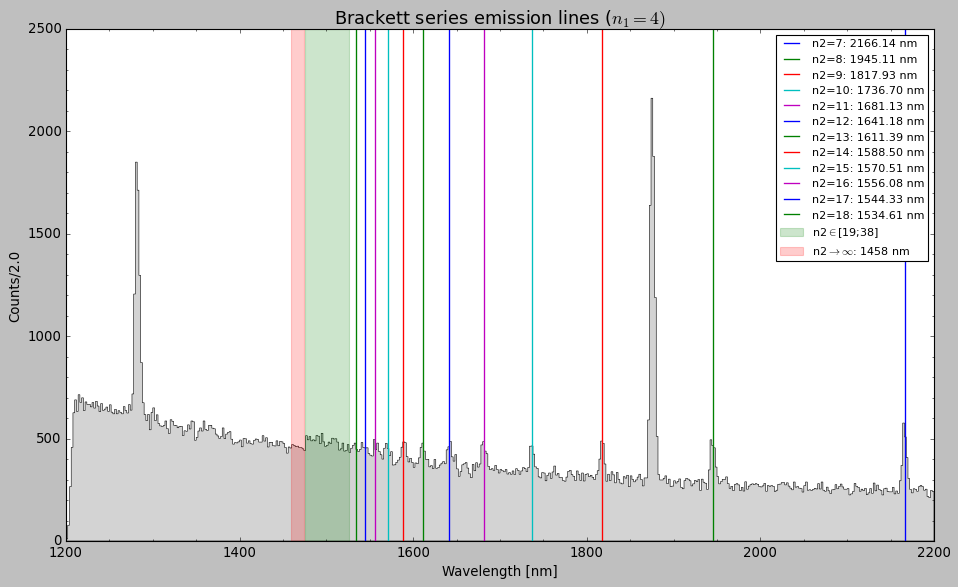

In [1372]:
def spectral_line(n1,n2):
    R=1.09677e-2
    return ( R * (- n1**(-2) + n2**(-2) ))**(-1)


fig, ax = plt.subplots(figsize=(14,8))
ax.hist(new_wavel, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='lightgrey',lw=0.5);
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title(r'Brackett series emission lines ($n_1=4)$', fontsize=16)
ax.minorticks_on()


ax.axvline(spectral_line(7,4), lw=1.2,color='C0', label=f'n2=7: {spectral_line(7,4):.2f} nm')
ax.axvline(spectral_line(8,4), lw=1.2,color='C1', label=f'n2=8: {spectral_line(8,4):.2f} nm')
ax.axvline(spectral_line(9,4), lw=1.2,color='C2', label=f'n2=9: {spectral_line(9,4):.2f} nm')
ax.axvline(spectral_line(10,4), lw=1.2,color='C3', label=f'n2=10: {spectral_line(10,4):.2f} nm')
ax.axvline(spectral_line(11,4), lw=1.2,color='C4', label=f'n2=11: {spectral_line(11,4):.2f} nm')
ax.axvline(spectral_line(12,4), lw=1.2,color='C0', label=f'n2=12: {spectral_line(12,4):.2f} nm')
ax.axvline(spectral_line(13,4), lw=1.2,color='C1', label=f'n2=13: {spectral_line(13,4):.2f} nm')
ax.axvline(spectral_line(14,4), lw=1.2,color='C2', label=f'n2=14: {spectral_line(14,4):.2f} nm')
ax.axvline(spectral_line(15,4), lw=1.2,color='C3', label=f'n2=15: {spectral_line(15,4):.2f} nm')
ax.axvline(spectral_line(16,4), lw=1.2,color='C4', label=f'n2=16: {spectral_line(16,4):.2f} nm')
ax.axvline(spectral_line(17,4), lw=1.2,color='C0', label=f'n2=17: {spectral_line(17,4):.2f} nm')
ax.axvline(spectral_line(18,4), lw=1.2,color='C1', label=f'n2=18: {spectral_line(18,4):.2f} nm')
ax.axvspan(spectral_line(19,4), spectral_line(38,4), alpha=0.2, color='green',label= r'n2$\in$[19;38]')
ax.axvspan(spectral_line(39,4), spectral_line(5000,4), alpha=0.2, color='red',label= r'n2$\rightarrow \infty $: 1458 nm')
ax.legend(loc='upper right', fontsize=10)

# fig.savefig('525_wavelenght_Bohr_hypothesis.pdf', bbox_inches='tight', dpi=600)

#### 5.2.6) You find that your measurements were affected by the supply voltage. Using the two n3 peaks, calibrate for the variation in supply voltage.

In [1396]:
def profile_x(x, y, bins=(50, 50), xyrange=[(0,50), (-1,1)]):
    
    H, xedges, yedges = np.histogram2d(x, y, bins=bins, range=xyrange)
    x_center = 0.5*(xedges[1:] + xedges[:-1])
    y_center = 0.5*(yedges[1:] + yedges[:-1])
    
    wsums = H.sum(1)
    
    mask = wsums > 0
    
    mean = (H*y_center).sum(1)[mask] / wsums[mask]
    mean_squared = (H*y_center**2).sum(1)[mask] / wsums[mask]
    std = np.sqrt( mean_squared - mean**2 ) / np.sqrt(wsums[mask]) 
    std_mask  = std > 0

    return x_center[mask][std_mask], mean[std_mask], std[std_mask]

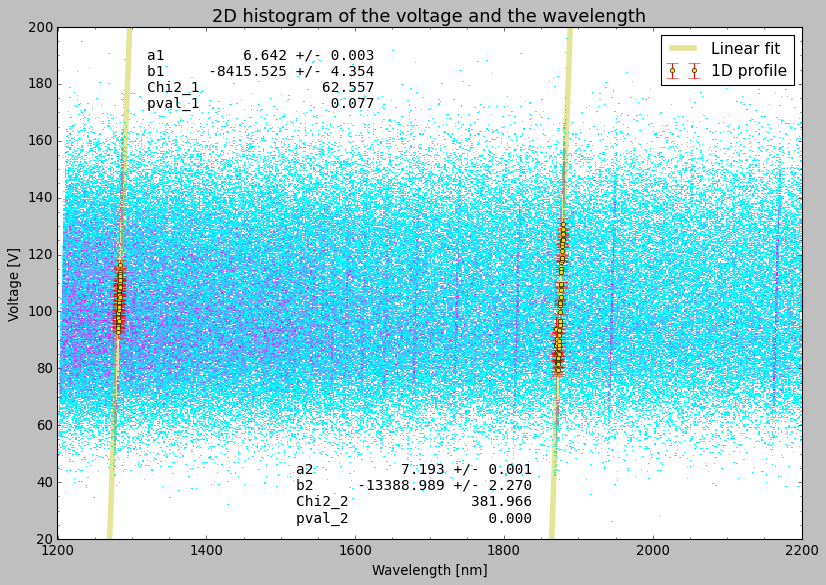

In [1655]:
#calculate the 1D profile of the voltage and the wavelength
x1, y1, yerr1 = profile_x(new_wavel, voltage, bins=(50,50), xyrange=[(1281,1284), (40,180)])             #peak 1
x2, y2, yerr2 = profile_x(new_wavel, voltage, bins=(50, 50), xyrange=[(1870,1880), (40,180)])             #peak 2


#plot a 2d histogram of the voltage and the wavelength
Nbins= 500
xmin, xmax = 1200, 2200
ymin, ymax = 20, 200


def linear(x, a, b):
    return a*x + b

chi2_1 = Chi2Regression(linear, x1, y1, yerr1)
minuit1 = Minuit(chi2_1, a=1, b=-100)
minuit1.migrad()
a1, b1 = minuit1.values


chi2_2 = Chi2Regression(linear, x2, y2, yerr2)
minuit2 = Minuit(chi2_2, a=1, b=-100)
minuit2.migrad()
a2, b2 = minuit2.values

chi2val1 = minuit1.fval
chi2val2 = minuit2.fval
pval1 = stats.chi2.sf(chi2val1, len(x1)-2)
pval2 = stats.chi2.sf(chi2val2, len(x2)-2)


x1space = np.linspace(1260, 1300, 100)
x2space = np.linspace(1850, 1900, 100)

fig , ax = plt.subplots(figsize=(12,8))
ax.hist2d(new_wavel, voltage, bins=Nbins, range=((xmin,xmax),(ymin,ymax)),cmap='cool',cmin=1, cmax=8)
ax.errorbar(x1, y1, yerr=yerr1, fmt='o',ms=4, ecolor='r', mec='k',mfc='gold',capsize=5,lw=1, label='1D profile')
ax.errorbar(x2, y2, yerr=yerr2, fmt='o',ms=4, ecolor='r', mec='k',mfc='gold',capsize=5,lw=1)
ax.plot(x1space, linear(x1space, a1, b1), color='C5', lw=5, label='Linear fit', ls='-',alpha=0.4)
ax.plot(x2space, linear(x2space,a2, b2), color='C5', lw=5, ls='-',alpha=0.4)
ax.set(xlabel='Wavelength [nm]', ylabel='Voltage [V]', xlim=(xmin,xmax), ylim=(ymin,ymax))
ax.set_title('2D histogram of the voltage and the wavelength', fontsize=16)
ax.minorticks_on()
ax.legend(loc='upper right', fontsize=14)


d1 = {'a1': [a1,minuit1.errors['a']], 
    'b1': [b1,minuit1.errors['b']],
    'Chi2_1': chi2val1,
    'pval_1': pval1}

d2 = {'a2': [a2,minuit2.errors['a']],
        'b2': [b2,minuit2.errors['b']],
        'Chi2_2': chi2val2,
        'pval_2': pval2}
    


text1 = nice_string_output(d1, extra_spacing=1, decimals=3)
text2 = nice_string_output(d2, extra_spacing=1, decimals=3)
add_text_to_ax(0.12, 0.96, text1, ax, fontsize=13)
add_text_to_ax(0.32, 0.15, text2, ax, fontsize=13)



# fig.savefig('526_1Dprofile_fit.pdf', bbox_inches='tight', dpi=600)


In [1619]:
mean_slope = np.mean([a1,a2])

#how should I calculate the error on the mean slope?
mean_slope_err = np.sqrt((minuit1.errors['a'])**2 + (minuit2.errors['a'])**2)

print('The mean slope is: ', mean_slope, '±', mean_slope_err)

#what is the corresponding slope for wavelength as a function of voltage?
slope_wavelength = 1/mean_slope
slope_wavelength_err = slope_wavelength * mean_slope_err/mean_slope

print('The slope for wavelength as a function of voltage is: ', slope_wavelength, '±', slope_wavelength_err)

The mean slope is:  6.917708271859754 ± 0.0036045315536022155
The slope for wavelength as a function of voltage is:  0.14455654397394246 ± 7.532243389813846e-05


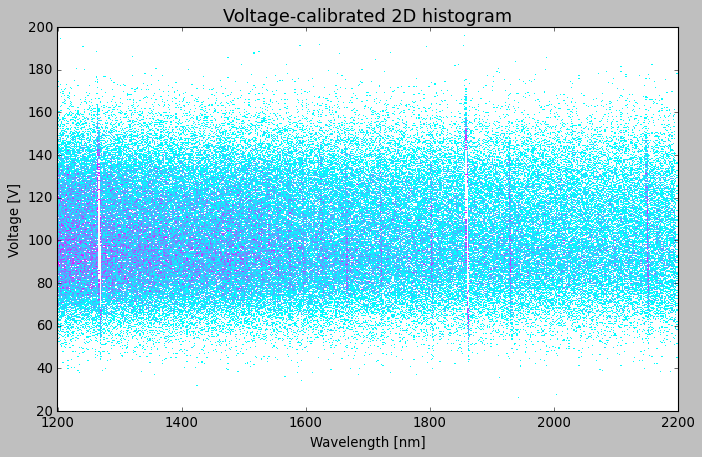

In [1649]:
# calibrate the variation in the voltage 
# new_voltage = voltage + slope_wavelength*voltage
new_wavelength = new_wavel - slope_wavelength*voltage


fig, ax = plt.subplots(figsize=(10,6))
ax.hist2d(new_wavelength, voltage, bins=Nbins, range=((xmin,xmax),(ymin,ymax)),cmap='cool',cmin=1, cmax=8)
ax.set(xlabel='Wavelength [nm]', ylabel='Voltage [V]', xlim=(xmin,xmax), ylim=(ymin,ymax))
ax.set_title('Voltage-calibrated 2D histogram', fontsize=16)

fig.savefig('526_2Dhist_voltage_calib_.pdf', dpi=600, bbox_inches='tight')

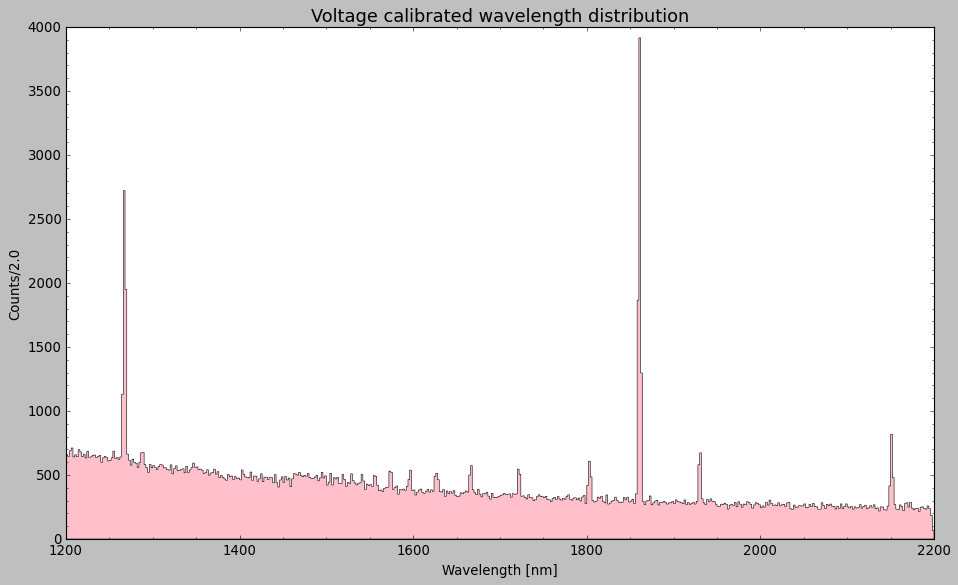

In [1657]:
Nbins = 500
xmin , xmax = 1200, 2200
binwidth = (xmax-xmin)/Nbins

counts , bin_edges = np.histogram(new_wavelength, bins=Nbins, range=(xmin,xmax))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


fig, ax = plt.subplots(figsize=(14,8))
ax.hist(new_wavelength, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='pink',lw=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title('Voltage calibrated wavelength distribution', fontsize=16)
ax.minorticks_on() 



# fig.savefig('526_wavelength_voltage_calib_peaks.pdf', dpi=600, bbox_inches='tight')

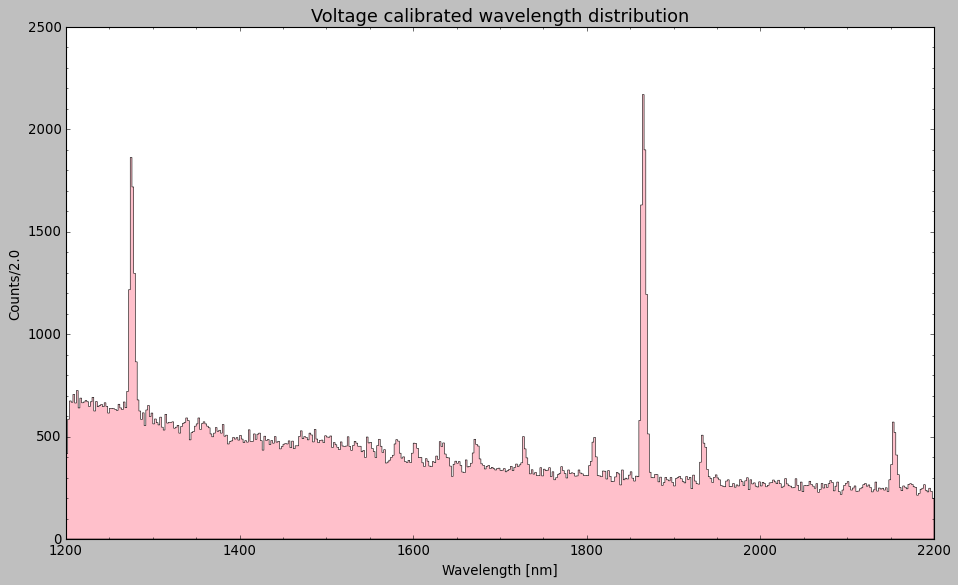

In [1658]:
Nbins = 500
xmin , xmax = 1200, 2200
binwidth = (xmax-xmin)/Nbins

counts , bin_edges = np.histogram(wavel, bins=Nbins, range=(xmin,xmax))
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])


fig, ax = plt.subplots(figsize=(14,8))
ax.hist(wavel, bins=Nbins, range=(xmin,xmax), histtype='stepfilled', color='pink',lw=0.5)
ax.set(xlabel='Wavelength [nm]', ylabel=r'Counts/{}'.format(binwidth), xlim=(xmin,xmax))
ax.set_title('Voltage calibrated wavelength distribution', fontsize=16)
ax.minorticks_on() 



# fig.savefig('526_wavelength_WITHOUT_calib_peaks.pdf', dpi=600, bbox_inches='tight')